# Dissertation Report on eCommerce Strategy Based on Product Brand Analysis, Customer Behaviour and Lifecycle.

Name: G Sahoo.

Student ID No: 720086048

**Data View and cleaning**

 Print all the field names (column headers), data type, check for percentage of number of missing values in **Oct 2019**

In [1]:
import dask.dataframe as dd
#importing Dask as dd

# Read the csv file
data = dd.read_csv('Oct_2019.csv')

data_types = data.dtypes 

# Count total missing values in each column
missing_values_count = data.isnull().sum()

# Calculate total number of entries in each column to find percentages (here total index size of the column will give total no of entries )
total_entries = data.index.size

# Calculate the percentage of missing values in each column, missing value/ total entries *100
percentage_missing = (missing_values_count / total_entries) * 100


results = dd.compute(data_types, missing_values_count, percentage_missing)

# Results
print("Field Names and Data Types:\n")
for dtype, column in zip(results[0].items(), data.columns):
    print(f"{column}: {dtype[1]}")

print("\nCount of Missing Values and Percentage Missing:\n")
for count, perc, column in zip(results[1], results[2], data.columns):
    print(f"{column}: Missing Count = {count}, Percentage Missing = {perc:.2f}%")

# Print the first 10 rows to see the entries
print("\nFirst 10 Rows of Data:\n")
print(data.head(10)) 

Field Names and Data Types:

event_time: object
event_type: object
product_id: int64
category_id: int64
category_code: object
brand: object
price: float64
user_id: int64
user_session: object

Count of Missing Values and Percentage Missing:

event_time: Missing Count = 0, Percentage Missing = 0.00%
event_type: Missing Count = 0, Percentage Missing = 0.00%
product_id: Missing Count = 0, Percentage Missing = 0.00%
category_id: Missing Count = 0, Percentage Missing = 0.00%
category_code: Missing Count = 13515609, Percentage Missing = 31.84%
brand: Missing Count = 6117080, Percentage Missing = 14.41%
price: Missing Count = 0, Percentage Missing = 0.00%
user_id: Missing Count = 0, Percentage Missing = 0.00%
user_session: Missing Count = 2, Percentage Missing = 0.00%

First 10 Rows of Data:

                event_time event_type  product_id          category_id  \
0  2019-10-01 00:00:00 UTC       view    44600062  2103807459595387724   
1  2019-10-01 00:00:00 UTC       view     3900821  20530

As the total data size is huge it didn't load on MS excel to visualise the data. We used Dask to handle large datasets as the data doesn't fit into memory.So, we have print 1st rows to understand the data entry pattern by printing the 1st 10 rows. 

Drop unnecessary columns

In [5]:
import dask.dataframe as dd


df = dd.read_csv('Oct_2019.csv')

# Drop the 'category_id' and 'user_session' columns
df = df.drop(['category_id', 'user_session'], axis=1)

# Save the cleaned data directly to a new CSV file
df.to_csv('Oct_2019_dropped.csv', index=False, single_file=True)

print("Columns dropped and file saved successfully.")


Columns dropped and file saved successfully.


As the data size is huge it took a lot of time to perform any operations on it. Moreover we could not find any use of the  'user_session' column so we decided to drop the column. Similarly, as we don't have any specific table for category we can’t use 'category_id' column a lot. Where as to perform category analysis we can utilise 'category_code' column. 

 Split 'category_code' into two different columns'Product_category' and 'Product_name'

In [10]:
import dask.dataframe as dd


data = dd.read_csv('Oct_2019_dropped.csv')

# Split 'category_code' into 'Product_Category' and 'Product'
data['Product_category'] = data['category_code'].str.split('.').str[0]
data['Product_name'] = data['category_code'].str.split('.').str[-1]

# Drop the 'category_code' column after splitting
data = data.drop(columns='category_code')

# print the first 5 rows to check 
print(data.head())

# Save the data in new CSV file
data.to_csv('Oct_2019_split.csv', single_file=True, index=False)

                event_time event_type  product_id     brand    price  \
0  2019-10-01 00:00:00 UTC       view    44600062  shiseido    35.79   
1  2019-10-01 00:00:00 UTC       view     3900821      aqua    33.20   
2  2019-10-01 00:00:01 UTC       view    17200506       NaN   543.10   
3  2019-10-01 00:00:01 UTC       view     1307067    lenovo   251.74   
4  2019-10-01 00:00:04 UTC       view     1004237     apple  1081.98   

     user_id Product_category  Product_name  
0  541312140              NaN           NaN  
1  554748717       appliances  water_heater  
2  519107250        furniture          sofa  
3  550050854        computers      notebook  
4  535871217      electronics    smartphone  


['C:\\Users\\User\\Desktop\\Ecomm_2019\\Oct_2019_split.csv']

Previously we observed the data in 'category_code' and this can be split into two parts. for example furniture.living_room.sofa. The 1st part shows the category and the last part shows the product name. So, We transformed the category_code into two parts Product_category and Product_name and dropped the category_code column. Finally after splitting saved the data in a new CSV file"Oct_2019_split" in same repository 

 Replace NaN in 'Product_Category', 'Product', and 'brand' with "Unknown" 

In [13]:
import dask.dataframe as dd

data = dd.read_csv('Oct_2019_split.csv')

# Replace NaN in 'Product_Category', 'Product', and 'brand' with "Unknown"
data['Product_category'] = data['Product_category'].fillna('Unknown')
data['Product_name'] = data['Product_name'].fillna('Unknown')
data['brand'] = data['brand'].fillna('Unknown')

# Save the modified data to a new CSV file
data.to_csv('Oct_2019_replced.csv', single_file=True, index=False)

# Print the first 5 rows to check 
print(data.head())

print("File has been processed and saved successfully.")


                event_time event_type  product_id     brand    price  \
0  2019-10-01 00:00:00 UTC       view    44600062  shiseido    35.79   
1  2019-10-01 00:00:00 UTC       view     3900821      aqua    33.20   
2  2019-10-01 00:00:01 UTC       view    17200506   Unknown   543.10   
3  2019-10-01 00:00:01 UTC       view     1307067    lenovo   251.74   
4  2019-10-01 00:00:04 UTC       view     1004237     apple  1081.98   

     user_id Product_category  Product_name  
0  541312140          Unknown       Unknown  
1  554748717       appliances  water_heater  
2  519107250        furniture          sofa  
3  550050854        computers      notebook  
4  535871217      electronics    smartphone  
File has been processed and saved successfully.


In the previous code we found category_code: Missing Count = 13515609. and clearly in 1st row we can see an empty cell with Nan which is basically an empty cell. As there is 31% of missing value we can’t remove those rows. So we decided to replace the empty cells with the word "Unknown". By doing this we considered a new category category named 'Unknown' without losing other data. After sucessful replacement save the data in a new file named as 'Oct_2019_replced.csv'

Data cleaning :Handling duplicates and empty cells if needed , Converting data types if required

In [15]:
import dask.dataframe as dd

# Load the  CSV file 
data = dd.read_csv('Oct_2019_replced.csv', dtype={'user_id': 'object'}) 
#user_id': 'object ensures that user_id is read as a string, avoiding potential issues with numeric interpretation

# Ensure 'price' is a float
data['price'] = data['price'].astype(float)

# Ensure 'event_time' is in the correct datetime format
data['event_time'] = dd.to_datetime(data['event_time'], errors='coerce', format='%Y-%m-%d %H:%M:%S %Z')

# Drop rows where 'event_time' or 'user_id' is missing after conversion and format checks
data = data.dropna(subset=['event_time', 'user_id'])

# Remove duplicate rows, if any
data = data.drop_duplicates()

# Check and remove rows with any empty cells
data = data.dropna()

data.to_csv('Oct_2019_final_clean.csv', single_file=True, index=False)

print("Data cleaning completed and file saved.")


Data cleaning completed and file saved.


Data cleaning :Handling duplicates and empty cells if needed , Converting data types if required. Here we made sure there are no empty cells with missing timestamp, checking the right data type ex: price as float , timestamp in Year month day hour sec millisec. Save the cleaned data as 'Oct_2019_final_clean.csv'

After cleaning check for 1st 5 rows and last 5 rows

In [16]:
import dask.dataframe as dd

# Load the CSV file using Dask
data = dd.read_csv('Oct_2019_final_clean.csv', parse_dates=['event_time'])

# Print the first 5 rows of the dataset
print("First 5 rows of the dataset:")
print(data.head())

# Print the last 5 rows of the dataset
print("\nLast 5 rows of the dataset:")
print(data.tail())

First 5 rows of the dataset:
                 event_time event_type  product_id     brand    price  \
0 2019-10-01 00:00:00+00:00       view    44600062  shiseido    35.79   
1 2019-10-01 00:00:00+00:00       view     3900821      aqua    33.20   
2 2019-10-01 00:00:01+00:00       view    17200506   Unknown   543.10   
3 2019-10-01 00:00:01+00:00       view     1307067    lenovo   251.74   
4 2019-10-01 00:00:04+00:00       view     1004237     apple  1081.98   

     user_id Product_category  Product_name  
0  541312140          Unknown       Unknown  
1  554748717       appliances  water_heater  
2  519107250        furniture          sofa  
3  550050854        computers      notebook  
4  535871217      electronics    smartphone  

Last 5 rows of the dataset:
                      event_time event_type  product_id      brand   price  \
786163 2019-10-31 23:59:58+00:00       view     2300275      gopro  527.40   
786164 2019-10-31 23:59:58+00:00       view    10800172    redmond   61

Printing Event types

In [17]:
import dask.dataframe as dd

# Load the CSV file using Dask
data = dd.read_csv('Oct_2019_final_clean.csv')

# Find all unique event types
unique_event_types = data['event_type'].unique().compute()

# Print the unique event types
print("Unique Event Types in the Dataset:")
print(unique_event_types)

Unique Event Types in the Dataset:
0        view
1    purchase
2        cart
Name: event_type, dtype: object


 Print all the field names (column headers), data type, check for percentage of number of missing values in **Nov 2019**

In [198]:
import dask.dataframe as dd

# Load the CSV file using Dask
data = dd.read_csv('Nov_2019.csv')

# Get data types for each column
data_types = data.dtypes

# Count missing values in each column
missing_values_count = data.isnull().sum()

# Calculate total number of entries in each column to compute percentages
total_entries = data.index.size

# Calculate the percentage of missing values in each column
percentage_missing = (missing_values_count / total_entries) * 100

# Compute the required information
results = dd.compute(data_types, missing_values_count, percentage_missing)

# Print results
print("Field Names and Data Types:\n")
for dtype, column in zip(results[0].items(), data.columns):
    print(f"{column}: {dtype[1]}")

print("\nCount of Missing Values and Percentage Missing:\n")
for count, perc, column in zip(results[1], results[2], data.columns):
    print(f"{column}: Missing Count = {count}, Percentage Missing = {perc:.2f}%")

# Print the first 10 rows of the DataFrame
print("\nFirst 10 Rows of Data:\n")
print(data.head(10))

Field Names and Data Types:

event_time: object
event_type: object
product_id: int64
category_id: int64
category_code: object
brand: object
price: float64
user_id: int64
user_session: object

Count of Missing Values and Percentage Missing:

event_time: Missing Count = 0, Percentage Missing = 0.00%
event_type: Missing Count = 0, Percentage Missing = 0.00%
product_id: Missing Count = 0, Percentage Missing = 0.00%
category_id: Missing Count = 0, Percentage Missing = 0.00%
category_code: Missing Count = 21898171, Percentage Missing = 32.44%
brand: Missing Count = 9224078, Percentage Missing = 13.66%
price: Missing Count = 0, Percentage Missing = 0.00%
user_id: Missing Count = 0, Percentage Missing = 0.00%
user_session: Missing Count = 10, Percentage Missing = 0.00%

First 10 Rows of Data:

                event_time event_type  product_id          category_id  \
0  2019-11-01 00:00:00 UTC       view     1003461  2053013555631882655   
1  2019-11-01 00:00:00 UTC       view     5000088  2053

Drop unnecessary columns from Nov 2019

In [202]:
import dask.dataframe as dd

df = dd.read_csv('Nov_2019.csv')
# Drop the 'category_id' and 'user_session' columns
df = df.drop(['category_id','product_id', 'user_session'], axis=1)

# Save the cleaned data directly to a new CSV file using Dask
# This avoids the need to load all data into memory
df.to_csv('Nov_2019_dropped.csv', index=False, single_file=True)

print("Columns dropped and file saved successfully.")

Columns dropped and file saved successfully.


Split 'category_code' into 'Product_Category' and 'Product'

In [203]:
import dask.dataframe as dd

# Load the large CSV file with Dask
data = dd.read_csv('Nov_2019_dropped.csv')

# Data transformation: Split 'category_code' into 'Product_Category' and 'Product'
data['Product_category'] = data['category_code'].str.split('.').str[0]
data['Product_name'] = data['category_code'].str.split('.').str[-1]

# Drop the 'category_code' column
data = data.drop(columns='category_code')

# Replace NaN in 'Product_Category', 'Product', and 'brand' with "Unknown"
data['Product_category'] = data['Product_category'].fillna('Unknown')
data['Product_name'] = data['Product_name'].fillna('Unknown')
data['brand'] = data['brand'].fillna('Unknown')

# Save the modified data to a new CSV file
data.to_csv('Oct_2019_replced.csv', single_file=True, index=False)

# Example to print the first 5 rows to check 
print(data.head())

print("File has been processed and saved successfully.")

                event_time event_type   brand   price    user_id  \
0  2019-11-01 00:00:00 UTC       view  xiaomi  489.07  520088904   
1  2019-11-01 00:00:00 UTC       view  janome  293.65  530496790   
2  2019-11-01 00:00:01 UTC       view   creed   28.31  561587266   
3  2019-11-01 00:00:01 UTC       view      lg  712.87  518085591   
4  2019-11-01 00:00:01 UTC       view  xiaomi  183.27  558856683   

  Product_category    Product_name  
0      electronics      smartphone  
1       appliances  sewing_machine  
2          Unknown         Unknown  
3       appliances          washer  
4      electronics      smartphone  
File has been processed and saved successfully.


Data cleaning for Nov 2019

In [204]:
import dask.dataframe as dd


data = dd.read_csv('Nov_2019_replced.csv', dtype={'user_id': 'object'}) 


# Ensure 'price' is a float
data['price'] = data['price'].astype(float)

# Ensure 'event_time' is in the correct datetime format
data['event_time'] = dd.to_datetime(data['event_time'], errors='coerce', format='%Y-%m-%d %H:%M:%S %Z')

# Drop rows where 'event_time' or 'user_id' is missing after conversion and format checks
data = data.dropna(subset=['event_time', 'user_id'])

# Remove duplicate rows, if any
data = data.drop_duplicates()

# Check and remove rows with any empty cells
data = data.dropna()

data.to_csv('Nov_2019_final_cleanXX.csv', single_file=True, index=False)

print("Data cleaning completed and file saved.")

Data cleaning completed and file saved.


Data cleaning for **Dec 2019**

In [208]:
import dask.dataframe as dd

df = dd.read_csv('Dec_2019.csv')
# Drop the 'category_id' and 'user_session' columns
df = df.drop(['category_id','product_id', 'user_session'], axis=1)

# Save the cleaned data to a new CSV file 
df.to_csv('Dec_2019_dropped.csv', index=False, single_file=True)

print("Columns dropped and file saved successfully.")

Columns dropped and file saved successfully.


In [209]:
import dask.dataframe as dd

# Load the data file
data = dd.read_csv('Dec_2019_dropped.csv')

# Data transformation: Split 'category_code' into 'Product_Category' and 'Product'
data['Product_category'] = data['category_code'].str.split('.').str[0]
data['Product_name'] = data['category_code'].str.split('.').str[-1]

# Drop the 'category_code' column
data = data.drop(columns='category_code')

# Replace NaN in 'Product_Category', 'Product', and 'brand' with "Unknown"
data['Product_category'] = data['Product_category'].fillna('Unknown')
data['Product_name'] = data['Product_name'].fillna('Unknown')
data['brand'] = data['brand'].fillna('Unknown')

# Save the modified data to a new CSV file
data.to_csv('Dec_2019_replcedXXX.csv', single_file=True, index=False)

# Example to print the first 5 rows to check 
print(data.head())

print("File has been processed and saved successfully.")

                event_time event_type    brand    price    user_id  \
0  2019-12-01 00:00:00 UTC       view    apple  1302.48  556695836   
1  2019-12-01 00:00:00 UTC       view    force   102.96  577702456   
2  2019-12-01 00:00:01 UTC       view    bosch   313.52  539453785   
3  2019-12-01 00:00:02 UTC   purchase  Unknown   132.31  535135317   
4  2019-12-01 00:00:02 UTC       view     nika   101.68  517987650   

  Product_category Product_name  
0     construction        light  
1          Unknown      Unknown  
2       appliances     massager  
3        computers      printer  
4          apparel     trousers  
File has been processed and saved successfully.


Data cleaning for all 3 files done successfully.

# Analysis

**Sales Conversion Analysis**

a. Add-to-Cart Conversion Rate for Oct 2019

In [18]:
import dask.dataframe as dd

# Load the dataset
data = dd.read_csv('Oct_2019_final_clean.csv')

# Total number of sessions (assuming each row is a unique session)
total_sessions = data.shape[0].compute()

# Number of Add-to-Cart Sessions
add_to_cart_sessions = data[data['event_type'] == 'cart'].shape[0].compute()

# Calculate Add-to-Cart Conversion Rate (%)
add_to_cart_conversion_rate = (add_to_cart_sessions / total_sessions) * 100

# Print the results
print("Total Number of Sessions: ", total_sessions)
print("Number of Add-to-Cart Sessions: ", add_to_cart_sessions)
print("Add-to-Cart Conversion Rate (%): {:.2f}%".format(add_to_cart_conversion_rate))


Total Number of Sessions:  42413557
Number of Add-to-Cart Sessions:  898443
Add-to-Cart Conversion Rate (%): 2.12%


b. Add-to-Cart Conversion Rate for Nov 2019

In [28]:
import dask.dataframe as dd

# Load the dataset
data = dd.read_csv('Nov_2019_final_cleanXX.csv')

# Total number of sessions (assuming each row is a unique session)
total_sessions = data.shape[0].compute()

# Number of Add-to-Cart Sessions
add_to_cart_sessions = data[data['event_type'] == 'cart'].shape[0].compute()

# Calculate Add-to-Cart Conversion Rate (%)
add_to_cart_conversion_rate = (add_to_cart_sessions / total_sessions) * 100

# Print the results
print("Total Number of Sessions: ", total_sessions)
print("Number of Add-to-Cart Sessions: ", add_to_cart_sessions)
print("Add-to-Cart Conversion Rate (%) For Nov 2019: {:.2f}%".format(add_to_cart_conversion_rate))


Total Number of Sessions:  67392131
Number of Add-to-Cart Sessions:  2930018
Add-to-Cart Conversion Rate (%) For Nov 2019: 4.35%


c. Add-to-Cart Conversion Rate(%) For Dec 2019

In [29]:
import dask.dataframe as dd

# Load the dataset
data = dd.read_csv('Dec_2019_replcedXXX.csv')

# Total number of sessions (assuming each row is a unique session)
total_sessions = data.shape[0].compute()

# Number of Add-to-Cart Sessions
add_to_cart_sessions = data[data['event_type'] == 'cart'].shape[0].compute()

# Calculate Add-to-Cart Conversion Rate (%)
add_to_cart_conversion_rate = (add_to_cart_sessions / total_sessions) * 100

# Print the results
print("Total Number of Sessions: ", total_sessions)
print("Number of Add-to-Cart Sessions: ", add_to_cart_sessions)
print("Add-to-Cart Conversion Rate(%) For Dec 2019: {:.2f}%".format(add_to_cart_conversion_rate))


Total Number of Sessions:  67542878
Number of Add-to-Cart Sessions:  3394763
Add-to-Cart Conversion Rate(%) For Dec 2019: 5.03%


d. Q4  Add-to-Cart Conversion Rate(%)

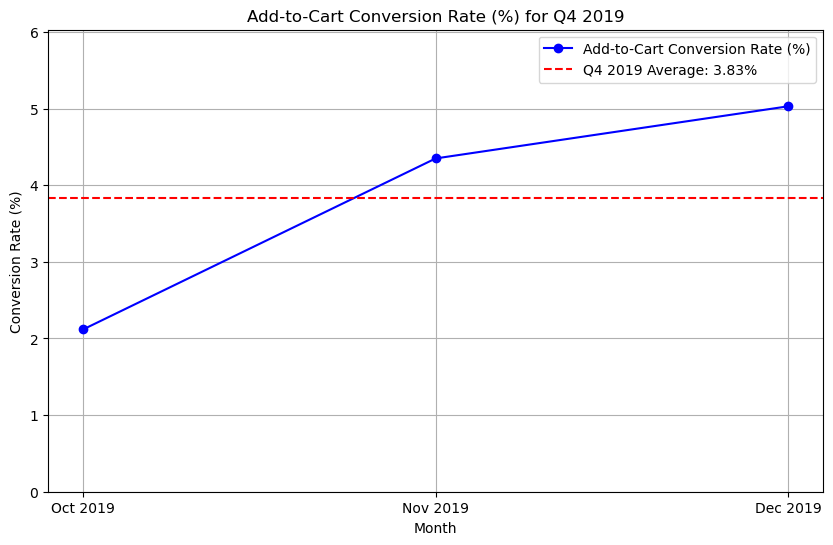

In [4]:
import matplotlib.pyplot as plt

# Data for the Add-to-Cart Conversion Rate
months = ['Oct 2019', 'Nov 2019', 'Dec 2019']
conversion_rates = [2.12, 4.35, 5.03]

# Calculate the average conversion rate for Q4 2019
average_conversion_rate_q4 = sum(conversion_rates) / len(conversion_rates)

# Create the line plot
plt.figure(figsize=(10, 6))
plt.plot(months, conversion_rates, marker='o', linestyle='-', color='b', label='Add-to-Cart Conversion Rate (%)')

# Draw a horizontal line for the average conversion rate
plt.axhline(y=average_conversion_rate_q4, color='r', linestyle='--', label=f'Q4 2019 Average: {average_conversion_rate_q4:.2f}%')

# Add labels and title
plt.title('Add-to-Cart Conversion Rate (%) for Q4 2019')
plt.xlabel('Month')
plt.ylabel('Conversion Rate (%)')
plt.ylim(0, max(conversion_rates) + 1)
plt.legend()

# Display the plot
plt.grid(True)
plt.show()

**Shopping cart Conversion Rate**

a. Shopping Cart Conversion Rate for Oct 2019

In [19]:
import pandas as pd

# Load the dataset 
data = pd.read_csv('Oct_2019_final_clean.csv')

# Calculate Number of Completed Purchases
number_of_completed_purchases = data[data['event_type'] == 'purchase'].shape[0]

# Calculate Number of Carts Created
number_of_carts_created = data[data['event_type'] == 'cart'].shape[0]

# Calculate Shopping Cart Conversion Rate
if number_of_carts_created > 0:
    shopping_cart_conversion_rate = (number_of_completed_purchases / number_of_carts_created) * 100
else:
    shopping_cart_conversion_rate = 0  # checks for division by zero

# Print the results
print(f"Number of Completed Purchases: {number_of_completed_purchases}")
print(f"Number of Carts Created: {number_of_carts_created}")
print(f"Shopping Cart Conversion Rate (%): {shopping_cart_conversion_rate:.2f}%")


Number of Completed Purchases: 742773
Number of Carts Created: 898443
Shopping Cart Conversion Rate (%): 82.67%


b. Shopping Cart Conversion Rate for Nov 2019

In [2]:
import dask.dataframe as dd


data = dd.read_csv('Nov_2019_final_cleanXX.csv')  
# Filterby event type
purchase_data = data[data['event_type'] == 'purchase'].compute()
cart_data = data[data['event_type'] == 'cart'].compute()

# Calculate the required metrics
number_of_completed_purchases = purchase_data.shape[0]
number_of_carts_created = cart_data.shape[0]

if number_of_carts_created > 0:
    shopping_cart_conversion_rate = (number_of_completed_purchases / number_of_carts_created) * 100
else:
    shopping_cart_conversion_rate = 0  

# Print the results
print(f"Number of Completed Purchases: {number_of_completed_purchases}")
print(f"Number of Carts Created: {number_of_carts_created}")
print(f"Shopping Cart Conversion Rate (%) for Nov 2019: {shopping_cart_conversion_rate:.2f}%")

Number of Completed Purchases: 916930
Number of Carts Created: 2930018
Shopping Cart Conversion Rate (%) for Nov 2019: 31.29%


c. Shopping Cart Conversion Rate for Dec 2019

In [1]:
import dask.dataframe as dd

# Load the dataset
data = dd.read_csv('Dec_2019_replcedXXX.csv')  

purchase_data = data[data['event_type'] == 'purchase'].compute()
cart_data = data[data['event_type'] == 'cart'].compute()

# Calculate the required metrics
number_of_completed_purchases = purchase_data.shape[0]
number_of_carts_created = cart_data.shape[0]

if number_of_carts_created > 0:
    shopping_cart_conversion_rate = (number_of_completed_purchases / number_of_carts_created) * 100
else:
    shopping_cart_conversion_rate = 0  

# Print the results
print(f"Number of Completed Purchases: {number_of_completed_purchases}")
print(f"Number of Carts Created: {number_of_carts_created}")
print(f"Shopping Cart Conversion Rate (%) for Dec 2019: {shopping_cart_conversion_rate:.2f}%")



Number of Completed Purchases: 1162048
Number of Carts Created: 3394763
Shopping Cart Conversion Rate (%) for Dec 2019: 34.23%


d.Shopping Cart Conversion Rate (%) for Q4 2019

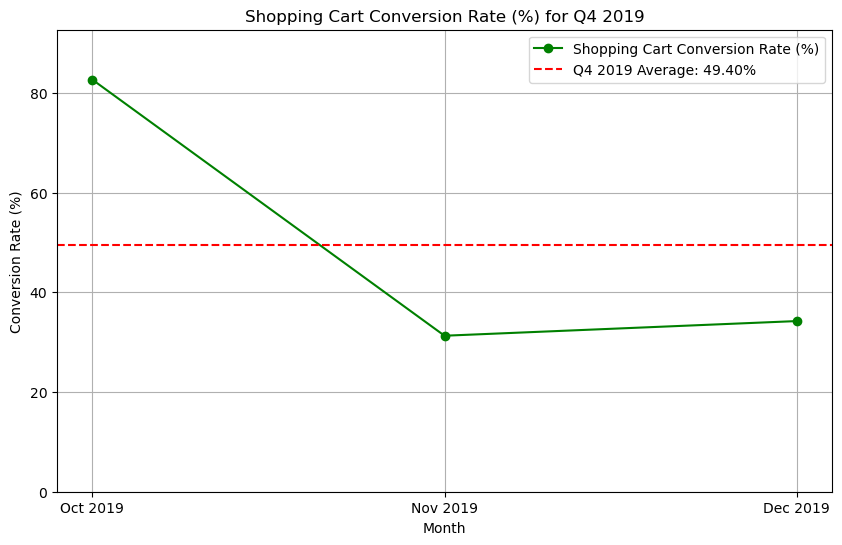

In [5]:
# Data for the Shopping Cart Conversion Rate
shopping_cart_conversion_rates = [82.67, 31.29, 34.23]

# Calculate the average Shopping Cart Conversion Rate for Q4 2019
average_shopping_cart_conversion_rate_q4 = sum(shopping_cart_conversion_rates) / len(shopping_cart_conversion_rates)

# Create the line plot
plt.figure(figsize=(10, 6))
plt.plot(months, shopping_cart_conversion_rates, marker='o', linestyle='-', color='g', label='Shopping Cart Conversion Rate (%)')

#  horizontal line for the average Shopping Cart Conversion Rate
plt.axhline(y=average_shopping_cart_conversion_rate_q4, color='r', linestyle='--', label=f'Q4 2019 Average: {average_shopping_cart_conversion_rate_q4:.2f}%')

# Add labels and title
plt.title('Shopping Cart Conversion Rate (%) for Q4 2019')
plt.xlabel('Month')
plt.ylabel('Conversion Rate (%)')
plt.ylim(0, max(shopping_cart_conversion_rates) + 10)
plt.legend()

# Display the plot
plt.grid(True)
plt.show()


Daily Add-to-Cart Conversion Rates for October 2019

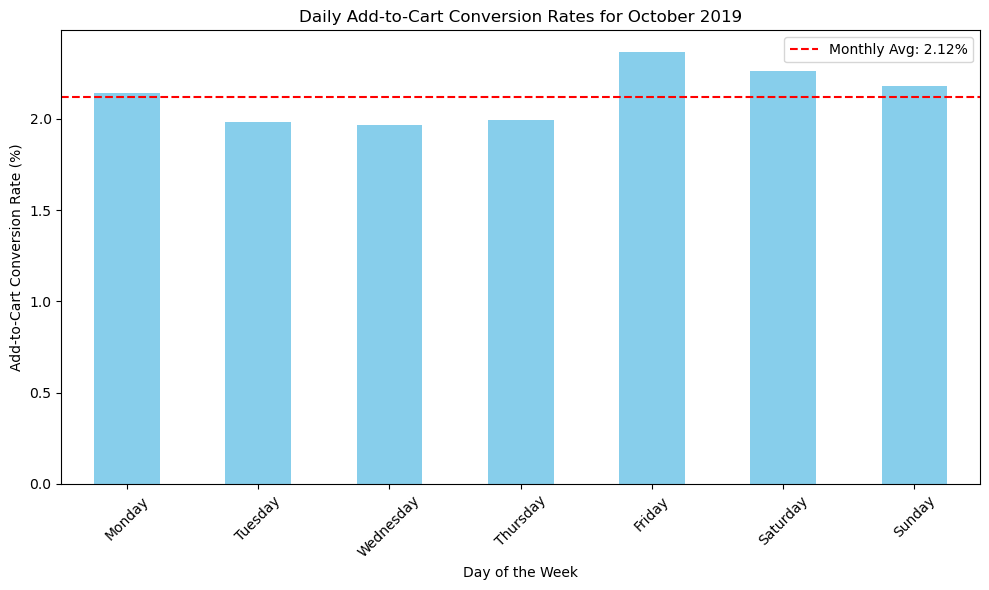

Daily Add-to-Cart Conversion Rates:
day_of_week
Monday       2.141062
Tuesday      1.983880
Wednesday    1.963480
Thursday     1.995428
Friday       2.366292
Saturday     2.259305
Sunday       2.181616
dtype: float64


In [34]:
import dask.dataframe as dd
import matplotlib.pyplot as plt

# Load the dataset
data = dd.read_csv('Oct_2019_final_clean.csv', parse_dates=['event_time'])

# Calculate the day of the week from 'event_time' (0=Monday, 6=Sunday)
data['day_of_week'] = data['event_time'].dt.dayofweek

# Group data by day of the week
grouped = data.groupby('day_of_week')

# Calculate total and add-to-cart sessions per day
total_sessions_per_day = grouped['event_type'].count().compute()
add_to_cart_sessions_per_day = grouped.apply(lambda x: (x['event_type'] == 'cart').sum(), meta=('x', 'int64')).compute()
# here meta is an argument used in Dask to define the expected output  will be an integer

# Calculate Add-to-Cart Conversion Rate for each day
conversion_rates_per_day = (add_to_cart_sessions_per_day / total_sessions_per_day) * 100

# Days of the week mapping
days = {0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4: 'Friday', 5: 'Saturday', 6: 'Sunday'}
conversion_rates_per_day.index = conversion_rates_per_day.index.map(days)

# Plotting the results
plt.figure(figsize=(10, 6))
conversion_rates_per_day.plot(kind='bar', color='skyblue')
plt.axhline(y=2.12, color='red', linestyle='--', label='Monthly Avg: 2.12%')
plt.title('Daily Add-to-Cart Conversion Rates for October 2019')
plt.xlabel('Day of the Week')
plt.ylabel('Add-to-Cart Conversion Rate (%)')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Print daily conversion rates
print("Daily Add-to-Cart Conversion Rates:")
print(conversion_rates_per_day)


Shopping Cart Abandonment Rate for Oct 2019

In [36]:
import dask.dataframe as dd

# Load the data
data = dd.read_csv('Oct_2019_final_clean.csv', parse_dates=['event_time'])

# Total number of cart 
total_carts_created = data[data['event_type'] == 'cart'].shape[0].compute()

# Total number of purchases completed
total_purchases_completed = data[data['event_type'] == 'purchase'].shape[0].compute()

# Calculate Shopping Cart Abandonment Rate
if total_carts_created > 0:  # To prevent division by zero
    shopping_cart_abandonment_rate = (1 - (total_purchases_completed / total_carts_created)) * 100
    print(f"Shopping Cart Abandonment Rate: {shopping_cart_abandonment_rate:.2f}%")
else:
    print("No carts were created during the period.")


Shopping Cart Abandonment Rate: 17.33%


Shopping Cart Abandonment Rate for Q4

Cart Abandon Rate (%) for Oct 2019: 17.33%
Cart Abandon Rate (%) for Nov 2019: 68.71%
Cart Abandon Rate (%) for Dec 2019: 65.77%


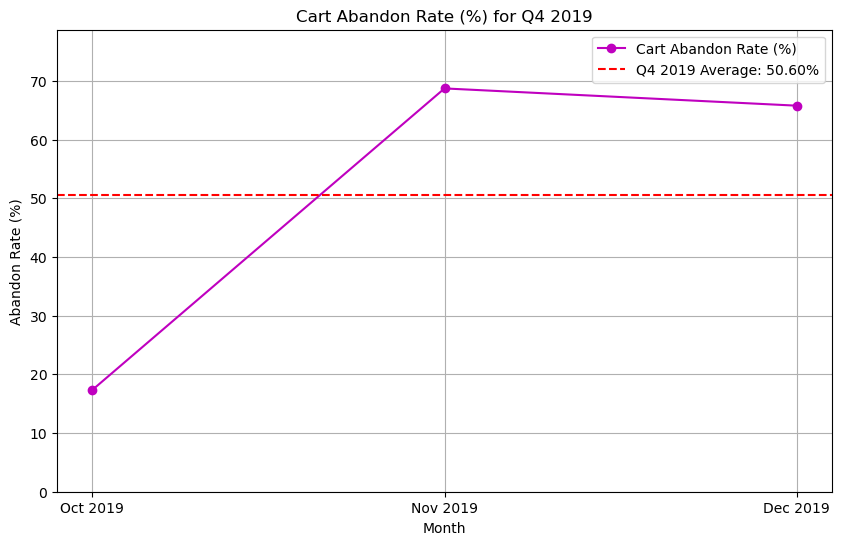

In [6]:
# Calculate Cart Abandon Rate (%) for each month
cart_abandon_rates = [100 - rate for rate in shopping_cart_conversion_rates]

# Calculate the average Cart Abandon Rate (%) for Q4 2019
average_cart_abandon_rate_q4 = sum(cart_abandon_rates) / len(cart_abandon_rates)

# Print Cart Abandon Rates for all 3 months
for month, rate in zip(months, cart_abandon_rates):
    print(f"Cart Abandon Rate (%) for {month}: {rate:.2f}%")

# Create the line plot for Cart Abandon Rate
plt.figure(figsize=(10, 6))
plt.plot(months, cart_abandon_rates, marker='o', linestyle='-', color='m', label='Cart Abandon Rate (%)')

# Draw a horizontal line for the average Cart Abandon Rate
plt.axhline(y=average_cart_abandon_rate_q4, color='r', linestyle='--', label=f'Q4 2019 Average: {average_cart_abandon_rate_q4:.2f}%')

# Add labels and title
plt.title('Cart Abandon Rate (%) for Q4 2019')
plt.xlabel('Month')
plt.ylabel('Abandon Rate (%)')
plt.ylim(0, max(cart_abandon_rates) + 10)
plt.legend()

# Display the plot
plt.grid(True)
plt.show()


Customer Lifecycle Value (CLV)

In [35]:
import dask.dataframe as dd

# Load the data
data = dd.read_csv('Oct_2019_final_clean.csv', parse_dates=['event_time'])

# Filter for 'purchase' events
purchases = data[data['event_type'] == 'purchase']

# Count the number of purchases per customer
purchases_per_customer = purchases.groupby('user_id').size().compute()

# Calculate the average number of purchases made by a customer
average_purchases_per_customer = purchases_per_customer.mean()

# Print the average number of purchases per customer
print(f"Average number of purchases made by a customer: {average_purchases_per_customer:.2f}")

# from prev code Average Order Value (AOV) for October 2019
aov = 309.56

# Calculate Customer Lifecycle Value (CLV)
clv = average_purchases_per_customer * aov

# Print Customer Lifecycle Value
print(f"Customer Lifecycle Value (CLV): ${clv:.2f}")


Average number of purchases made by a customer: 2.14
Customer Lifecycle Value (CLV): $662.41


Shopping Cart Abandonment Rate

Percentage of average views per hour for 'Unknown' category with 'Unknown' product and 'Unknown' brand

In [48]:
# 5. Average views per hour for October 2019
hours_in_october = 31 * 24  # Assuming October has 31 days
average_views_per_hour_oct = total_views_oct / hours_in_october
print("Average views per hour for October 2019:", average_views_per_hour_oct)

# 6. Average views per hour for 'Unknown' category, 'Unknown' product, 'Unknown' brand
average_views_per_hour_unknown_triple = total_views_unknown_triple / hours_in_october
print("Average views per hour for 'Unknown' category with 'Unknown' product and 'Unknown' brand:", average_views_per_hour_unknown_triple)

# 7. Percentage of average views per hour for the specific 'Unknown' case
percentage_of_average_views_unknown_triple = (average_views_per_hour_unknown_triple / average_views_per_hour_oct) * 100
print("Percentage of average views per hour for 'Unknown' category with 'Unknown' product and 'Unknown' brand:", percentage_of_average_views_unknown_triple)


Average views per hour for October 2019: 54801.533602150535
Average views per hour for 'Unknown' category with 'Unknown' product and 'Unknown' brand: 4970.427419354839
Percentage of average views per hour for 'Unknown' category with 'Unknown' product and 'Unknown' brand: 9.069869203732992


**Category Analysis**

Total number of unique categories in the data

In [72]:
# Get unique categories from the 'Product_category' column
unique_categories = df['Product_category'].unique()
total_unique_categories = len(unique_categories)

# Print the total number of unique product categories
print("Total number of unique categories in the Oct 2019 data:", total_unique_categories)

Total number of unique categories in the Oct 2019 data: 14


top 10 categories

In [76]:

# 1. Total number of views generated by October 2019
total_views_oct = views_data.shape[0]
print(f"Total number of views in October 2019: {total_views_oct}")

# Count views for all categories
views_per_category = views_data['Product_category'].value_counts()

# Calculate what percent of total views each category holds
views_percent = (views_per_category / total_views_oct) * 100

# Print the percentage of views for each category
print("Percentage of total views held by each category:")
for category, percent in views_percent.items():
    print(f"{category}: {percent:.2f}%")

Total number of views in October 2019: 40772341
Percentage of total views held by each category:
electronics: 36.88%
Unknown: 32.46%
appliances: 11.77%
computers: 5.56%
apparel: 3.76%
furniture: 3.03%
auto: 2.44%
construction: 1.75%
kids: 1.26%
accessories: 0.58%
sport: 0.43%
medicine: 0.03%
country_yard: 0.03%
stationery: 0.02%


Total views for each Category in October 2019

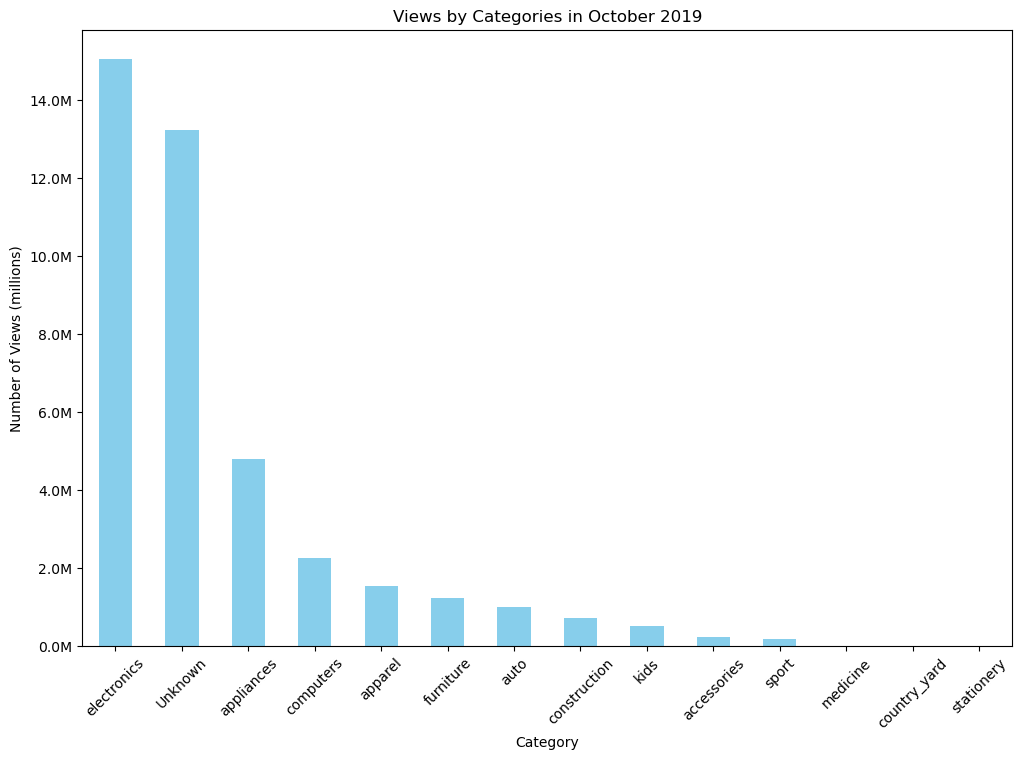

In [80]:
# Count views for all categories
views_per_category = views_data['Product_category'].value_counts()

# Plotting all categories
plt.figure(figsize=(12, 8))
(views_per_category / 1e6).plot(kind='bar', color='skyblue')  # Convert to millions before plotting

plt.title('Views by Categories in October 2019')
plt.xlabel('Category')
plt.ylabel('Number of Views (millions)')
plt.xticks(rotation=45)

# Adjust y-axis to show labels in millions
ticks_loc = plt.gca().get_yticks().tolist()  # Get the current locations and labels
plt.gca().yaxis.set_major_locator(plt.FixedLocator(ticks_loc))
plt.gca().set_yticklabels(['{:.1f}M'.format(y) for y in ticks_loc])  # Set new labels

plt.show()


All views by Categories (in millions)

In [82]:
# Print views for all categories in millions
print("Views by Categories in October 2019 (in millions):")
for category, views in views_per_category.items():
    print(f"{category}: {views / 1e6:.2f} million")

Views by Categories in October 2019 (in millions):
electronics: 15.04 million
Unknown: 13.23 million
appliances: 4.80 million
computers: 2.27 million
apparel: 1.53 million
furniture: 1.24 million
auto: 0.99 million
construction: 0.71 million
kids: 0.51 million
accessories: 0.24 million
sport: 0.17 million
medicine: 0.01 million
country_yard: 0.01 million
stationery: 0.01 million


Percentage of total views for 'Unknown' category with 'Unknown' product and 'Unknown' brand

In [46]:
import pandas as pd

# Load the data
df = pd.read_csv('Oct_2019_final_clean.csv', parse_dates=['event_time'])

# Filter data for October 2019 and views only
df['event_time'] = df['event_time'].dt.tz_localize(None) 
october_data = df[df['event_time'].dt.month == 10]
views_data = october_data[october_data['event_type'] == 'view']

# 1. Total views for 'Unknown' category, 'Unknown' Product name with 'Unknown' brand
unknown_triple = views_data[(views_data['Product_category'] == 'Unknown') &
                            (views_data['Product_name'] == 'Unknown') &
                            (views_data['brand'] == 'Unknown')]
total_views_unknown_triple = unknown_triple.shape[0]
print("Total views for 'Unknown' category with 'Unknown' product and 'Unknown' brand:", total_views_unknown_triple)

# 2. Total views for 'Unknown' category, 'Unknown' Product name with some brand
unknown_double_with_brand = views_data[(views_data['Product_category'] == 'Unknown') &
                                       (views_data['Product_name'] == 'Unknown') &
                                       (views_data['brand'] != 'Unknown')]
total_views_unknown_double_with_brand = unknown_double_with_brand.shape[0]
print("Total views for 'Unknown' category with 'Unknown' product with some brand:", total_views_unknown_double_with_brand)

# 3. Total number of views in October 2019
total_views_oct = views_data.shape[0]
print("Total number of views in October 2019:", total_views_oct)

# 4. Calculate and print the percentage of total views for 'Unknown' category with 'Unknown' product and 'Unknown' brand
percentage_views_unknown_triple = (total_views_unknown_triple / total_views_oct) * 100
print("Percentage of total views for 'Unknown' category with 'Unknown' product and 'Unknown' brand:", round(percentage_views_unknown_triple, 2), "%")



Total views for 'Unknown' category with 'Unknown' product and 'Unknown' brand: 3697998
Total views for 'Unknown' category with 'Unknown' product with some brand: 9535498
Total number of views in October 2019: 40772341
Percentage of total views for 'Unknown' category with 'Unknown' product and 'Unknown' brand: 9.07 %


Total views for 'Unknown' category with a specified brand

Total views for 'Unknown' category with a specified brand: 9.54 million
Top 10 Viewed Brands in Unknown Category (in millions):
lucente: 0.64 million
xiaomi: 0.35 million
cordiant: 0.35 million
stels: 0.23 million
sony: 0.22 million
bosch: 0.22 million
triangle: 0.21 million
nokian: 0.18 million
force: 0.16 million
redmond: 0.15 million


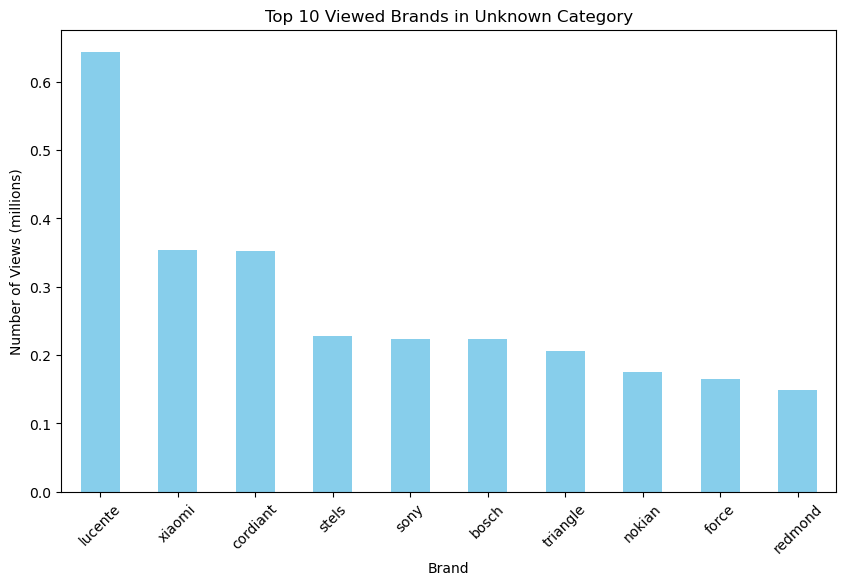

Total views for 'Unknown' category with 'Unknown' brand: 3.70 million


In [60]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
df = pd.read_csv('Oct_2019_final_clean.csv')

# Filter rows for 'Unknown' category and 'view' event_type
unknown_category_views = df[(df['Product_category'] == 'Unknown') & (df['event_type'] == 'view')]

# Count views with a specified brand (not 'Unknown')
views_with_brands = unknown_category_views[unknown_category_views['brand'] != 'Unknown']
total_views_with_brands = views_with_brands.shape[0]
print(f"Total views for 'Unknown' category with a specified brand: {total_views_with_brands / 1e6:.2f} million")

# Top 10 viewed brands in the unknown category
top_brands = views_with_brands['brand'].value_counts().head(10)
print("Top 10 Viewed Brands in Unknown Category (in millions):")
for brand, count in top_brands.items():
    print(f"{brand}: {count / 1e6:.2f} million")

# Plotting top 10 viewed brands
plt.figure(figsize=(10, 6))
(top_brands / 1e6).plot(kind='bar', color='skyblue') 
plt.title('Top 10 Viewed Brands in Unknown Category')
plt.xlabel('Brand')
plt.ylabel('Number of Views (millions)')
plt.xticks(rotation=45)
plt.show()

# Count views where both category and brand are 'Unknown'
total_unknown_brand_views = unknown_category_views[unknown_category_views['brand'] == 'Unknown'].shape[0]
print(f"Total views for 'Unknown' category with 'Unknown' brand: {total_unknown_brand_views / 1e6:.2f} million")


Calculate view to cart conversion for each category

Total view to cart conversion rate for October 2019: 0.0220 (or 2.20%)
Categories with the highest conversion from view to cart:
electronics: 0.0434
medicine: 0.0368
appliances: 0.0186
stationery: 0.0144
construction: 0.0141
computers: 0.0118
auto: 0.0090
Unknown: 0.0078
sport: 0.0058
kids: 0.0049
country_yard: 0.0038
accessories: 0.0023
furniture: 0.0019
apparel: 0.0000


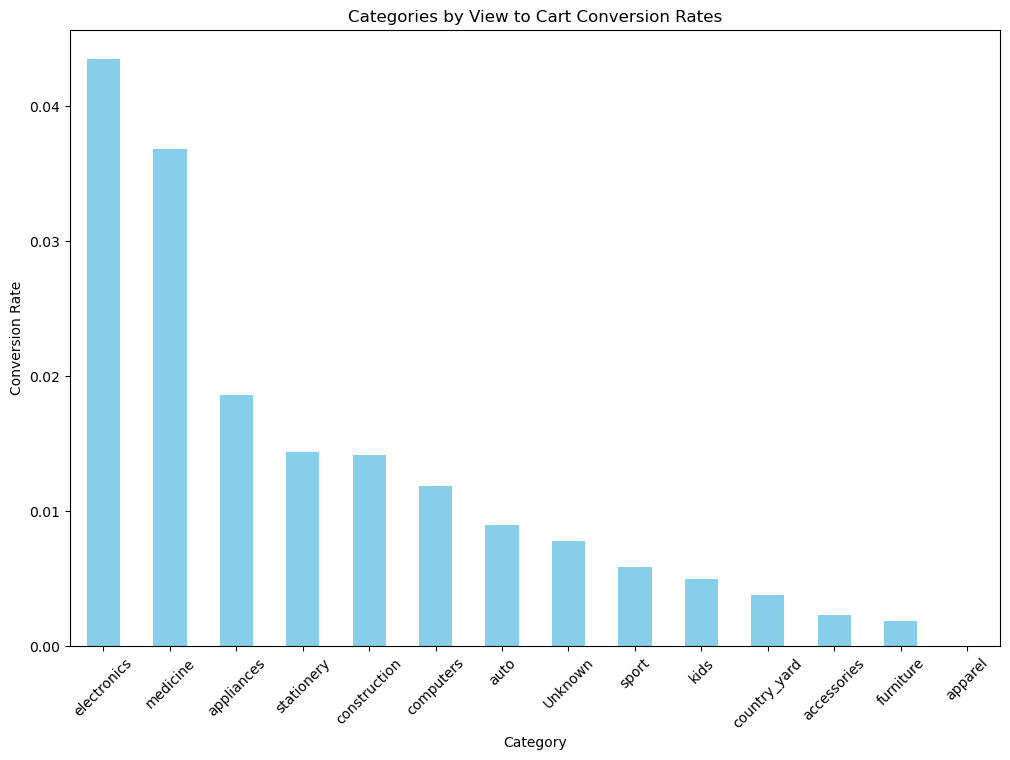

In [88]:
# 1. Calculate total view to cart conversion rate for October 2019
total_views = view_data.shape[0]
total_carts = cart_data.shape[0]
total_conversion_rate = total_carts / total_views if total_views > 0 else 0  # Prevent division by zero

print(f"Total view to cart conversion rate for October 2019: {total_conversion_rate:.4f} (or {total_conversion_rate * 100:.2f}%)")

# 2. Calculate view to cart conversion for each category
# Count views and carts per category
views_per_category = view_data['Product_category'].value_counts()
carts_per_category = cart_data['Product_category'].value_counts()

# Calculate conversion rates for each category (assuming a simple ratio of carts to views)
conversion_rates = (carts_per_category / views_per_category).dropna().sort_values(ascending=False)
print("Categories with the highest conversion from view to cart:")
for category, rate in conversion_rates.items():
    print(f"{category}: {rate:.4f}")  # Rates as fractions, not in millions

# 3. Plot in bar graph for all categories
plt.figure(figsize=(12, 8))
conversion_rates.plot(kind='bar', color='skyblue')
plt.title('Categories by View to Cart Conversion Rates')
plt.xlabel('Category')
plt.ylabel('Conversion Rate')
plt.xticks(rotation=45)
plt.show()

Cart to Purchase Conversion Rates by Category

Total cart to purchase conversion rate for October 2019: 0.8267 (or 82.67%)

Number of carts per category:
electronics: 653158 carts
Unknown: 102980 carts
appliances: 89371 carts
computers: 26821 carts
construction: 10081 carts
auto: 8916 carts
kids: 2534 carts
furniture: 2331 carts
sport: 1015 carts
accessories: 537 carts
medicine: 514 carts
stationery: 106 carts
country_yard: 53 carts
apparel: 26 carts

Number of purchases per category:
electronics: 422979 purchases
Unknown: 173411 purchases
appliances: 74988 purchases
computers: 27853 purchases
auto: 10619 purchases
furniture: 8299 purchases
apparel: 8002 purchases
construction: 7801 purchases
kids: 5482 purchases
accessories: 1587 purchases
sport: 1236 purchases
medicine: 310 purchases
stationery: 134 purchases
country_yard: 72 purchases

Categories with the highest conversion from cart to purchase:
apparel: 307.7692
furniture: 3.5603
accessories: 2.9553
kids: 2.1634
Unknown: 1.6839
country_yard: 1.3585
stationery: 1.2642
sport: 1.

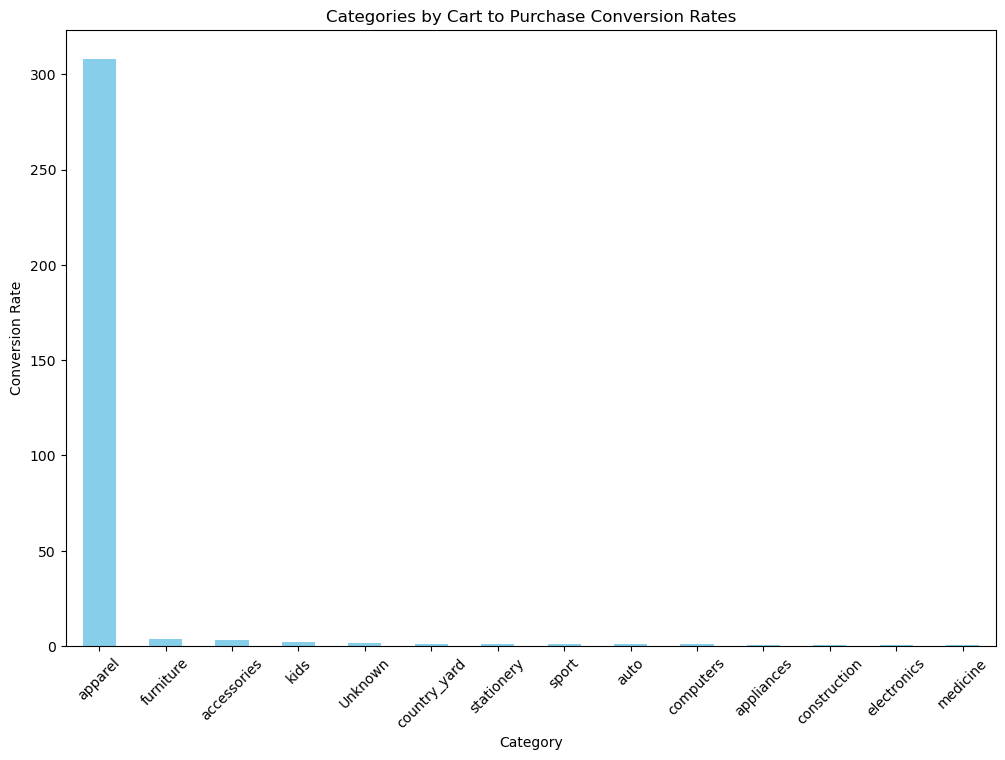

In [92]:

# Filter data for cart and purchase events
cart_data = df[df['event_type'] == 'cart']
purchase_data = df[df['event_type'] == 'purchase']

# 1. Calculate total cart to purchase conversion rate for October 2019
total_carts = cart_data.shape[0]
total_purchases = purchase_data.shape[0]
total_conversion_rate = total_purchases / total_carts if total_carts > 0 else 0  # Prevent division by zero

print(f"Total cart to purchase conversion rate for October 2019: {total_conversion_rate:.4f} (or {total_conversion_rate * 100:.2f}%)")

# 2. Count carts and purchases per category
carts_per_category = cart_data['Product_category'].value_counts()
purchases_per_category = purchase_data['Product_category'].value_counts()

# Print the number of carts and purchases per category
print("\nNumber of carts per category:")
for category, carts in carts_per_category.items():
    print(f"{category}: {carts} carts")

print("\nNumber of purchases per category:")
for category, purchases in purchases_per_category.items():
    print(f"{category}: {purchases} purchases")

# Calculate conversion rates for each category
conversion_rates = (purchases_per_category / carts_per_category).dropna().sort_values(ascending=False)
print("\nCategories with the highest conversion from cart to purchase:")
for category, rate in conversion_rates.items():
    print(f"{category}: {rate:.4f}")

# 3. Plot in bar graph for all categories
plt.figure(figsize=(12, 8))
conversion_rates.plot(kind='bar', color='skyblue')
plt.title('Categories by Cart to Purchase Conversion Rates')
plt.xlabel('Category')
plt.ylabel('Conversion Rate')
plt.xticks(rotation=45)
plt.show()

Average Number of Sales Per Hour by Category in October 2019

Average number of sales per hour in October 2019 by category:
electronics: 568.52
Unknown: 233.08
appliances: 100.79
computers: 37.44
auto: 14.27
furniture: 11.15
apparel: 10.76
construction: 10.49
kids: 7.37
accessories: 2.13
sport: 1.66
medicine: 0.42
stationery: 0.18
country_yard: 0.10


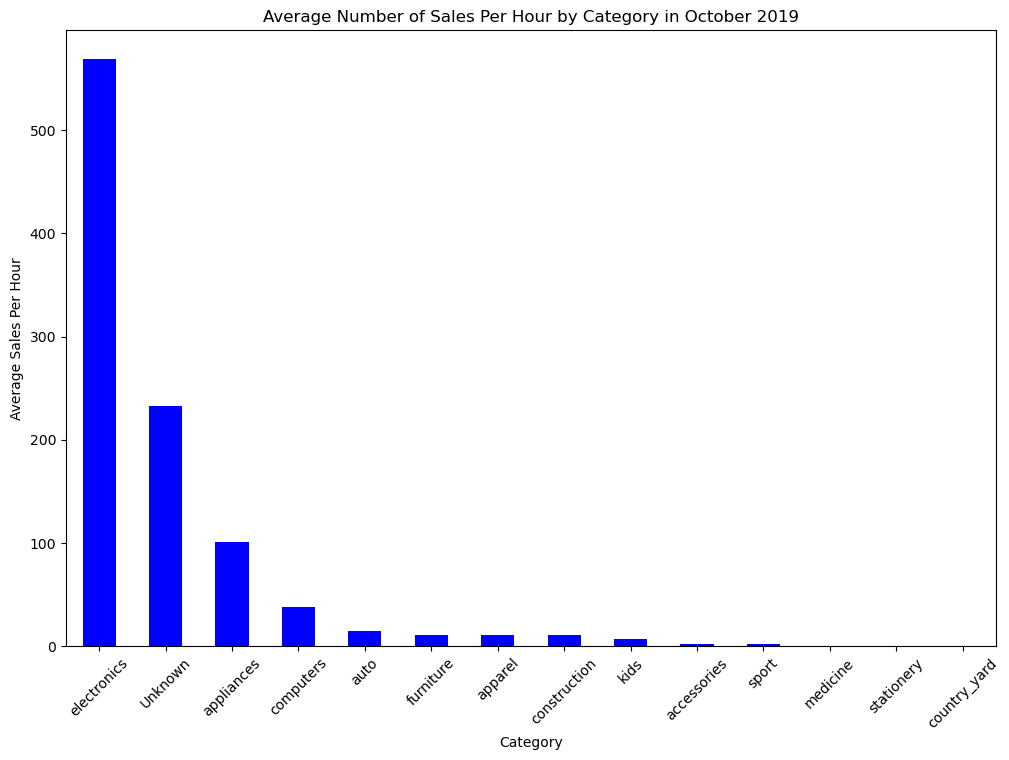

In [96]:
# Normalize timezone to None and ensure 'event_time' is a datetime object for easy handling
purchase_data['event_time'] = pd.to_datetime(purchase_data['event_time']).dt.tz_localize(None)

# Filter data for October 2019 only
october_purchases = purchase_data[purchase_data['event_time'].dt.month == 10]

# Count purchases per category
purchases_per_category = october_purchases['Product_category'].value_counts()

# Calculate number of hours in October 2019
hours_in_october = 31 * 24  

# Calculate average sales per hour for each category
average_sales_per_hour = purchases_per_category / hours_in_october

# Print the average number of sales per hour made by each category
print("Average number of sales per hour in October 2019 by category:")
for category, avg_sales in average_sales_per_hour.items():
    print(f"{category}: {avg_sales:.2f}")

# Plotting the results
plt.figure(figsize=(12, 8))
average_sales_per_hour.plot(kind='bar', color='blue')
plt.title('Average Number of Sales Per Hour by Category in October 2019')
plt.xlabel('Category')
plt.ylabel('Average Sales Per Hour')
plt.xticks(rotation=45)
plt.show()

**Peak Analysis**

Total number of views in Oct 2019

In [97]:
total_views = df[df['event_type'] == 'view'].shape[0]
print("Total number of views in Oct 2019:", total_views)


Total number of views in Oct 2019: 40772341


Avg views per hour

In [99]:
# Ensure 'event_time' is a datetime object and normalize timezone to None for easy handling
df['event_time'] = pd.to_datetime(df['event_time'], errors='coerce').dt.tz_localize(None)

# Filter for view events
view_data = df[df['event_type'] == 'view']

# Calculate total views
total_views = view_data.shape[0]

# Ensure there are enough data points to calculate the range
if not view_data['event_time'].empty:
    # Calculate total hours in the dataset
    total_hours = (view_data['event_time'].max() - view_data['event_time'].min()).total_seconds() / 3600

    # Calculate average views per hour
    average_views_per_hour = total_views / total_hours if total_hours > 0 else 0

    print(f"Average views per hour: {average_views_per_hour:.2f}")
else:
    print("invalid data")

Average views per hour: 54801.55


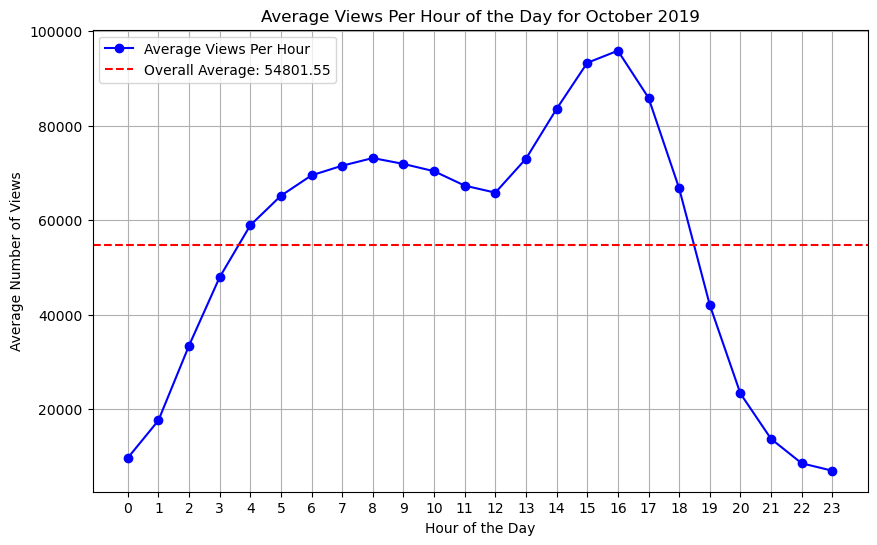

In [100]:
# Extract the hour of the day from the event_time
views_data['hour'] = views_data['event_time'].dt.hour

# Group by hour and calculate the average number of views per hour
average_views_per_hour = views_data.groupby('hour').size().div(len(views_data['event_time'].dt.date.unique()))

# Overall average views per hour for October 2019
overall_average_views = 54801.55

# Plotting the results
plt.figure(figsize=(10, 6))
average_views_per_hour.plot(kind='line', color='blue', marker='o', label='Average Views Per Hour')
plt.axhline(y=overall_average_views, color='red', linestyle='--', label=f'Overall Average: {overall_average_views}')
plt.title('Average Views Per Hour of the Day for October 2019')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Number of Views')
plt.grid(True)
plt.xticks(range(0, 24)) 
plt.legend()
plt.show()

In [101]:
# Sort the results to find the top 5 hours with the highest average views
top_5_hours = average_views_per_hour.sort_values(ascending=False).head(5)

# Print the results
print("Top 5 hours with the highest average views:")
print(top_5_hours)

Top 5 hours with the highest average views:
hour
16    95863.645161
15    93300.032258
17    85905.741935
14    83549.774194
8     73147.354839
dtype: float64


In [114]:
# Ensure 'event_time' is a datetime object and normalize timezone to None for easy handling
df['event_time'] = pd.to_datetime(df['event_time']).dt.tz_localize(None)

# Total number of visits (assuming all rows are visits)
total_visits = df.shape[0]

# Determine the number of unique days in the dataset
unique_days = df['event_time'].dt.date.nunique()

# Calculate average visits per day
average_visits_per_day = total_visits / unique_days

# Print the average number of visits per day
print(f"Average visits per day: {average_visits_per_day:.2f}")

Average visits per day: 1368179.26


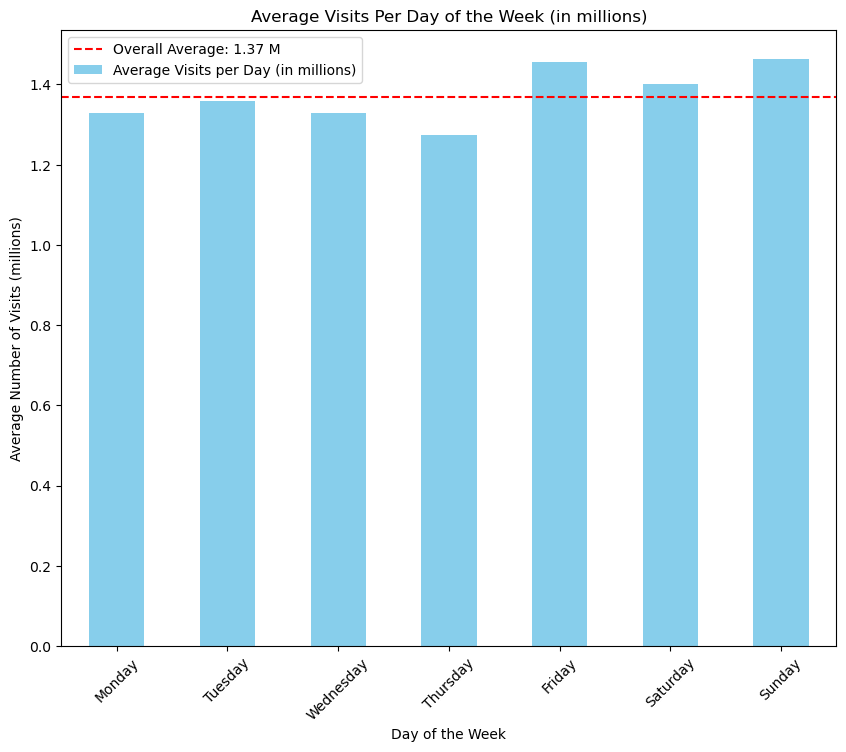

In [118]:
df['event_time'] = pd.to_datetime(df['event_time']).dt.tz_localize(None)

# Extract the day of the week and the date from 'event_time'
df['day_of_week'] = df['event_time'].dt.dayofweek
df['date'] = df['event_time'].dt.date

# Count visits per day of the week
visits_per_day = df.groupby(['day_of_week', 'date']).size().reset_index(name='visits')

# Calculate average visits per day of the week
average_visits_per_day_of_week = visits_per_day.groupby('day_of_week')['visits'].mean()

# Map the day of the week for better readability
day_mapping = {0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4: 'Friday', 5: 'Saturday', 6: 'Sunday'}
average_visits_per_day_of_week.index = average_visits_per_day_of_week.index.map(day_mapping)

# Overall average visits per day, provided as 1368179.26
overall_average_visits = 1368179.26

# Plotting the results
plt.figure(figsize=(10, 8))
(average_visits_per_day_of_week / 1e6).plot(kind='bar', color='skyblue', label='Average Visits per Day (in millions)')
plt.axhline(y=overall_average_visits / 1e6, color='red', linestyle='--', label=f'Overall Average: {overall_average_visits / 1e6:.2f} M')
plt.title('Average Visits Per Day of the Week (in millions)')
plt.xlabel('Day of the Week')
plt.ylabel('Average Number of Visits (millions)')
plt.xticks(rotation=45)
plt.legend()
plt.show()

In [116]:
# Print the average number of visits for each day of the week
print("Average visits per day of the week (in millions):")
for day, avg_visits in average_visits_per_day_of_week.items():
    print(f"{day}: {avg_visits / 1e6:.2f} million")

Average visits per day of the week (in millions):
Monday: 1.33 million
Tuesday: 1.36 million
Wednesday: 1.33 million
Thursday: 1.28 million
Friday: 1.46 million
Saturday: 1.40 million
Sunday: 1.46 million


carts

In [121]:
# Filter for cart events
cart_data = df[df['event_type'] == 'cart']
total_carts_october = october_carts.shape[0]

# Print the total number of carts
print(f"Total number of carts in October 2019: {total_carts_october}")

Total number of carts in October 2019: 898443


In [124]:
# Calculate the total hours in October (31 days * 24 hours)
total_hours_in_october = 31 * 24

# Calculate average carts per hour by dividing the total carts by the total hours in October
average_carts_per_hour_october = carts_per_hour.sum() / total_hours_in_october

# Print average carts per hour for October 2019
print(f"Average carts per hour in October 2019: {average_carts_per_hour_october:.2f}")

Average carts per hour in October 2019: 1207.58


In [125]:
number_of_days = cart_data['event_time'].dt.date.nunique()

# Calculate average carts per hour
average_carts_per_hour = carts_per_hour / number_of_days

# Print average carts per hour
print("Average carts per hour:")
for hour, average in average_carts_per_hour.items():
    print(f"Hour {hour}: {average:.2f} carts")

Average carts per hour:
Hour 0: 124.81 carts
Hour 2: 557.39 carts
Hour 3: 1085.23 carts
Hour 4: 1504.39 carts
Hour 5: 1789.55 carts
Hour 6: 1955.06 carts
Hour 7: 2014.84 carts
Hour 8: 2097.29 carts
Hour 9: 2097.77 carts
Hour 10: 1996.81 carts
Hour 11: 1870.94 carts
Hour 12: 1717.13 carts
Hour 13: 1634.39 carts
Hour 14: 1577.35 carts
Hour 1: 242.74 carts
Hour 15: 1579.00 carts
Hour 16: 1467.16 carts
Hour 17: 1236.42 carts
Hour 18: 970.48 carts
Hour 19: 635.87 carts
Hour 20: 365.48 carts
Hour 21: 220.65 carts
Hour 22: 139.52 carts
Hour 23: 101.77 carts


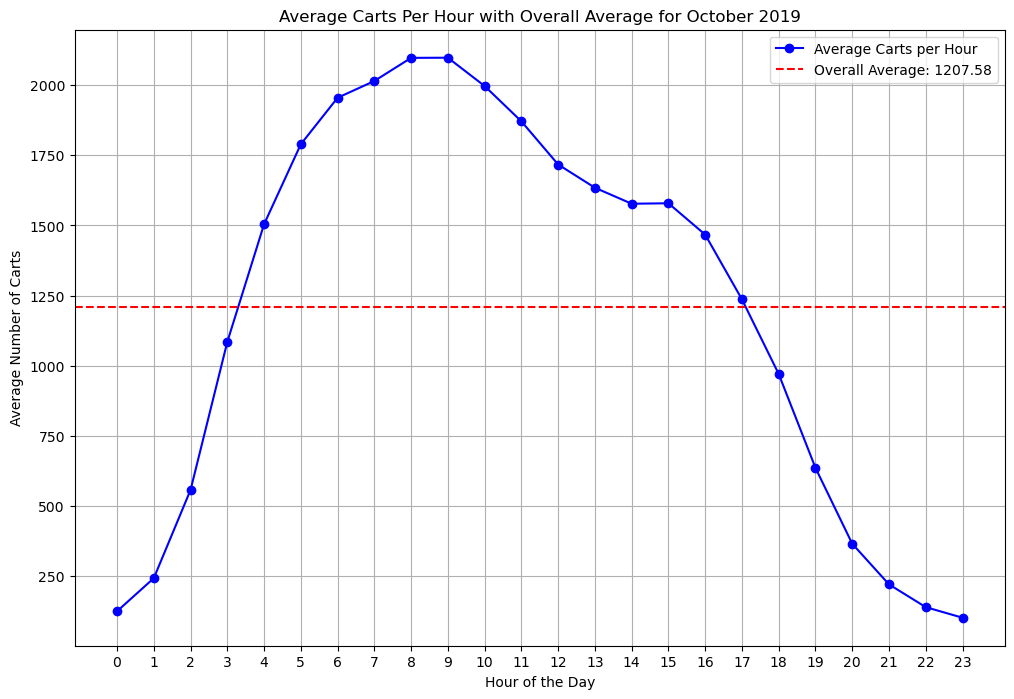

In [127]:
hourly_average_carts = {
    0: 124.81, 1: 242.74, 2: 557.39, 3: 1085.23, 4: 1504.39, 5: 1789.55,
    6: 1955.06, 7: 2014.84, 8: 2097.29, 9: 2097.77, 10: 1996.81,
    11: 1870.94, 12: 1717.13, 13: 1634.39, 14: 1577.35, 15: 1579.00,
    16: 1467.16, 17: 1236.42, 18: 970.48, 19: 635.87, 20: 365.48,
    21: 220.65, 22: 139.52, 23: 101.77
}

# Convert dictionary to a Pandas Series for easier plotting
hourly_carts_series = pd.Series(hourly_average_carts)

# Overall average carts per hour for October 2019
overall_average = 1207.58

# Plotting
plt.figure(figsize=(12, 8))
hourly_carts_series.plot(kind='line', color='blue', marker='o', label='Average Carts per Hour')
plt.axhline(y=overall_average, color='red', linestyle='--', label=f'Overall Average: {overall_average}')
plt.title('Average Carts Per Hour with Overall Average for October 2019')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Number of Carts')
plt.grid(True)
plt.xticks(range(0, 24))  
plt.legend()
plt.show()

In [128]:
daily_carts = cart_data.groupby('date').size()

# Calculate the average number of carts per day
average_daily_carts = daily_carts.mean()

# Print the average daily carts
print(f"Average daily carts for October 2019: {average_daily_carts:.2f}")

Average daily carts for October 2019: 28982.03


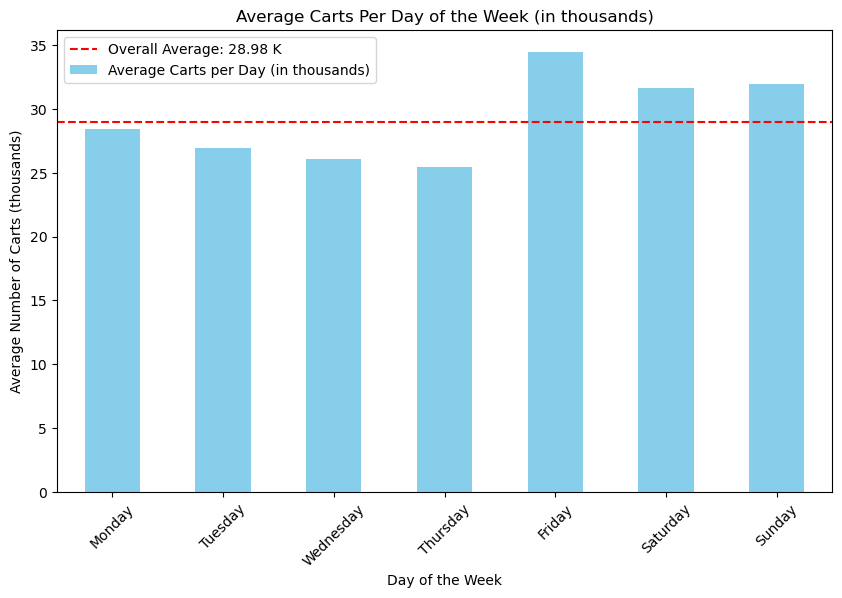

In [129]:
# Filter for cart events
cart_data = df[df['event_type'] == 'cart']

# Extract the day of the week and the date from 'event_time'
cart_data['day_of_week'] = cart_data['event_time'].dt.dayofweek
cart_data['date'] = cart_data['event_time'].dt.date

# Group by day of the week and date, then count the number of carts
carts_per_day = cart_data.groupby(['day_of_week', 'date']).size().reset_index(name='carts')

# Calculate average carts per day of the week
average_carts_per_day_of_week = carts_per_day.groupby('day_of_week')['carts'].mean()

# Map the day of the week for better readability
day_mapping = {0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4: 'Friday', 5: 'Saturday', 6: 'Sunday'}
average_carts_per_day_of_week.index = average_carts_per_day_of_week.index.map(day_mapping)

# Overall average daily carts for October 2019
overall_average_carts = 28982.03

# Plotting the results
plt.figure(figsize=(10, 6))
(average_carts_per_day_of_week / 1e3).plot(kind='bar', color='skyblue', label='Average Carts per Day (in thousands)')
plt.axhline(y=overall_average_carts / 1e3, color='red', linestyle='--', label=f'Overall Average: {overall_average_carts / 1e3:.2f} K')
plt.title('Average Carts Per Day of the Week (in thousands)')
plt.xlabel('Day of the Week')
plt.ylabel('Average Number of Carts (thousands)')
plt.xticks(rotation=45)
plt.legend()
plt.show()

Purchases for Oct 2019

In [133]:
purchase_data = df['event_type'] == 'purchase'
# Calculate the total number of purchases
total_purchases = purchase_data.shape[0]
# Print the total number of purchases and the total amount spent
print(f"Total number of purchases in October: {total_purchases}")

Total number of purchases in October: 42413557


In [137]:
# Normalize timezone to None and ensure 'event_time' is a datetime object for easy handling
df['event_time'] = pd.to_datetime(df['event_time']).dt.tz_localize(None)

# Filter for purchase events specifically for October 2019
purchase_data = df[(df['event_type'] == 'purchase') & (df['event_time'].dt.month == 10)]

# Extract the hour from each purchase event
purchase_data['hour'] = purchase_data['event_time'].dt.hour

# Group by hour and count the number of purchases
purchases_per_hour = purchase_data.groupby('hour').size()

# Calculate the number of days in October to normalize the data by the number of days
number_of_days_in_october = purchase_data['event_time'].dt.day.nunique()

# Calculate the average number of purchases per hour
average_purchases_per_hour = purchases_per_hour / number_of_days_in_october

# Print the average number of purchases per hour
print("Average number of purchases per hour in October 2019:")
for hour, average in average_purchases_per_hour.items():
    print(f"Hour {hour}: {average:.2f} purchases")

Average number of purchases per hour in October 2019:
Hour 0: 95.13 purchases
Hour 1: 178.26 purchases
Hour 2: 450.58 purchases
Hour 3: 955.87 purchases
Hour 4: 1327.19 purchases
Hour 5: 1550.58 purchases
Hour 6: 1677.48 purchases
Hour 7: 1722.71 purchases
Hour 8: 1780.48 purchases
Hour 9: 1780.06 purchases
Hour 10: 1674.26 purchases
Hour 11: 1526.16 purchases
Hour 12: 1349.68 purchases
Hour 13: 1262.42 purchases
Hour 14: 1205.26 purchases
Hour 15: 1213.94 purchases
Hour 16: 1153.94 purchases
Hour 17: 995.87 purchases
Hour 18: 784.55 purchases
Hour 19: 540.23 purchases
Hour 20: 319.10 purchases
Hour 21: 202.52 purchases
Hour 22: 123.77 purchases
Hour 23: 90.39 purchases


In [151]:
# Extract hour and date from event_time
df['hour'] = df['event_time'].dt.hour
df['date'] = df['event_time'].dt.date

# Count purchases per hour across all days
purchases_per_hour = df.groupby(['date', 'hour']).size().groupby('hour').mean()

# Calculate average purchases per hour
average_purchases_per_hour = purchases_per_hour.mean()

print(f"Average purchases per hour: {average_purchases_per_hour:.2f}")

Average purchases per hour: 998.60


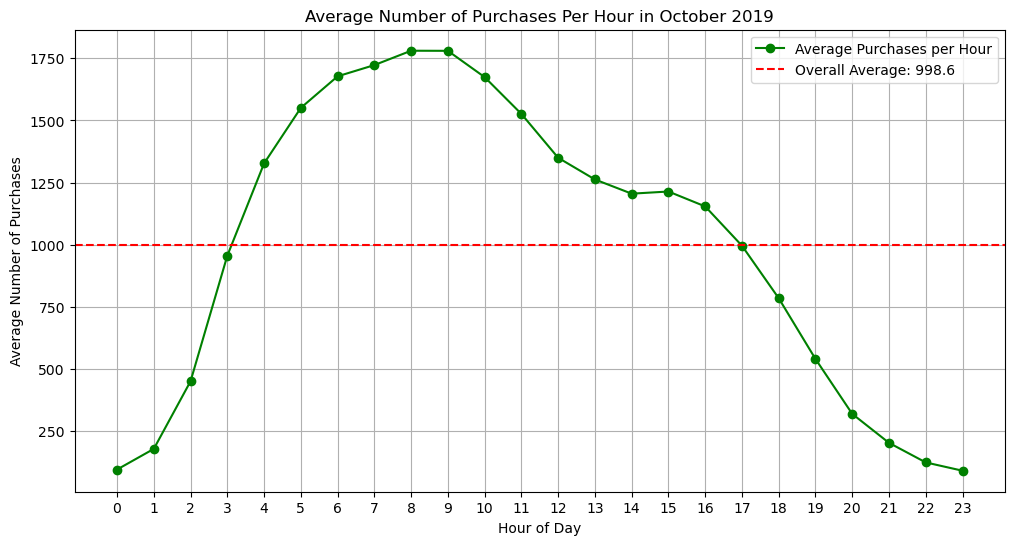

In [141]:

purchases_per_hour = purchase_data.groupby('hour').size()

# Calculate the number of days in October to normalize the data by the number of days
number_of_days_in_october = purchase_data['event_time'].dt.day.nunique()

# Calculate the average number of purchases per hour
average_purchases_per_hour = purchases_per_hour / number_of_days_in_october

# Overall average number of purchases per hour for October 2019 (provided)
overall_average_purchases = 998.60

# Plotting the results
plt.figure(figsize=(12, 6))
average_purchases_per_hour.plot(kind='line', marker='o', color='green', label='Average Purchases per Hour')
plt.axhline(y=overall_average_purchases, color='red', linestyle='--', label=f'Overall Average: {overall_average_purchases}')
plt.title('Average Number of Purchases Per Hour in October 2019')
plt.xlabel('Hour of Day')
plt.ylabel('Average Number of Purchases')
plt.xticks(range(0, 24)) 
plt.legend()
plt.grid(True)
plt.show()

In [147]:
average_daily_purchases = daily_purchases.mean()
# Print the average daily purchases
print(f"Average daily purchases: {average_daily_purchases:.2f}")

Average daily purchases: 23960.42


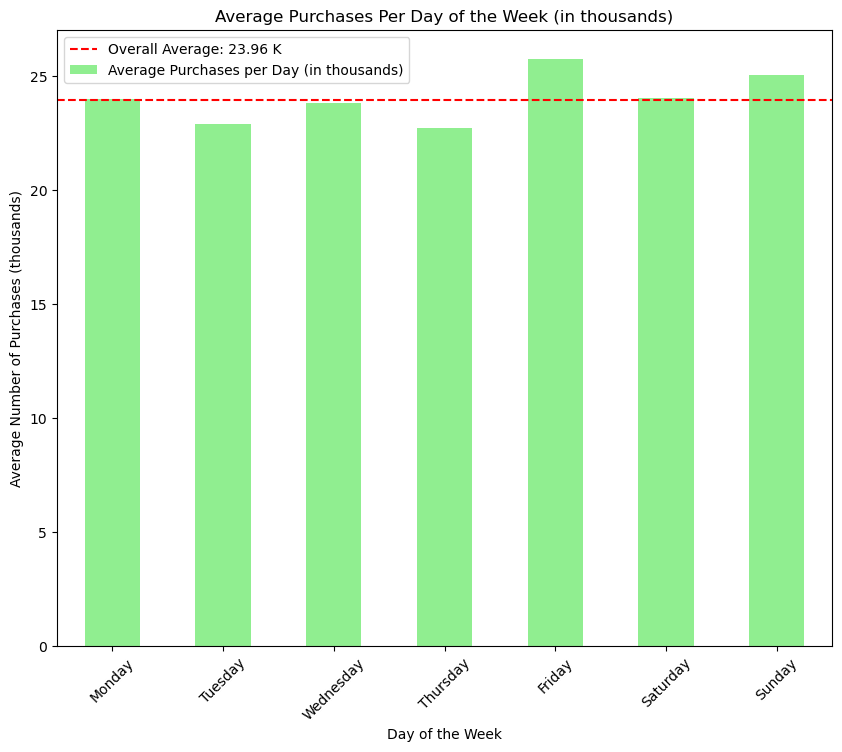

In [146]:
# Filter for purchase events
purchase_data = df[df['event_type'] == 'purchase']

# Extract the day of the week and the date from 'event_time'
purchase_data['day_of_week'] = purchase_data['event_time'].dt.dayofweek
purchase_data['date'] = purchase_data['event_time'].dt.date

# Group by day of the week and date, then count the number of purchases
purchases_per_day = purchase_data.groupby(['day_of_week', 'date']).size().reset_index(name='purchases')

# Calculate average purchases per day of the week
average_purchases_per_day_of_week = purchases_per_day.groupby('day_of_week')['purchases'].mean()

# Map the day of the week for better readability
day_mapping = {0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4: 'Friday', 5: 'Saturday', 6: 'Sunday'}
average_purchases_per_day_of_week.index = average_purchases_per_day_of_week.index.map(day_mapping)

# Overall average daily purchases
overall_average_purchases = 23960.42

# Plotting the results
plt.figure(figsize=(10, 8))
(average_purchases_per_day_of_week / 1e3).plot(kind='bar', color='lightgreen', label='Average Purchases per Day (in thousands)')
plt.axhline(y=overall_average_purchases / 1e3, color='red', linestyle='--', label=f'Overall Average: {overall_average_purchases / 1e3:.2f} K')
plt.title('Average Purchases Per Day of the Week (in thousands)')
plt.xlabel('Day of the Week')
plt.ylabel('Average Number of Purchases (thousands)')
plt.xticks(rotation=45)
plt.legend()
plt.show()

# Product analysis

total number of products 

In [152]:
total_unique_products = df['product_id'].nunique()

# Print the total number of unique products
print(f"Total number of unique products: {total_unique_products}")

Total number of unique products: 42241


top 10 viewed product names

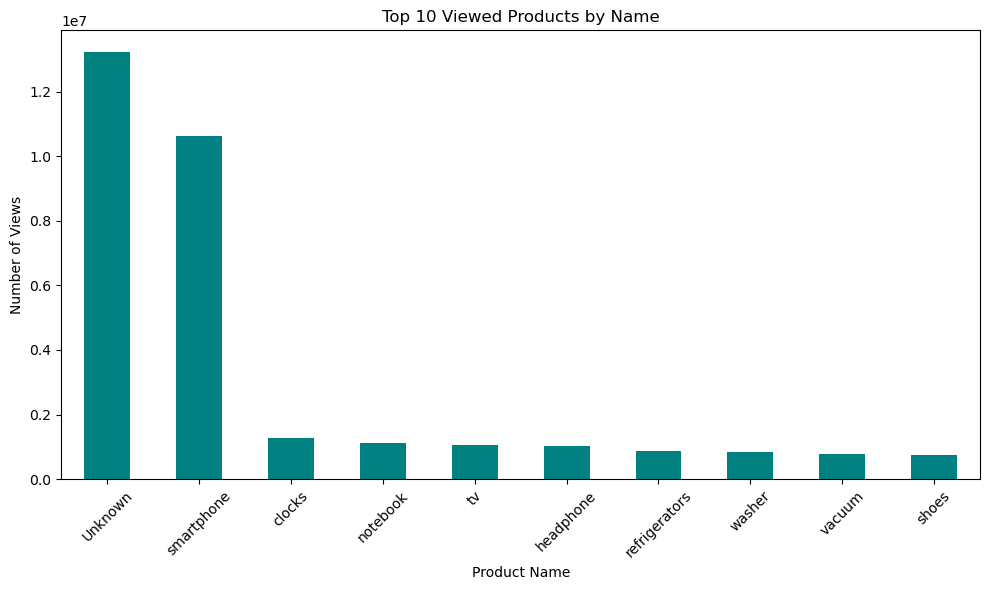

Top 10 Viewed Products by Name:
Product_name
Unknown          13233496
smartphone       10617327
clocks            1272495
notebook          1106254
tv                1055857
headphone         1018333
refrigerators      863332
washer             831199
vacuum             771972
shoes              759617
Name: count, dtype: int64


In [170]:
import dask.dataframe as dd
import matplotlib.pyplot as plt

# Load the dataset
data = dd.read_csv('Oct_2019_final_clean.csv', parse_dates=['event_time'])

# Filter for 'view' events
views = data[data['event_type'] == 'view']

# Calculate top 10 viewed products by name
top_products = views['Product_name'].value_counts().nlargest(10).compute()

# Plotting the top 10 viewed products by name
plt.figure(figsize=(10, 6))
top_products.plot(kind='bar', color='teal')
plt.title('Top 10 Viewed Products by Name')
plt.xlabel('Product Name')
plt.ylabel('Number of Views')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Print the results
print("Top 10 Viewed Products by Name:")
print(top_products)

Top 10 Products Added to Cart

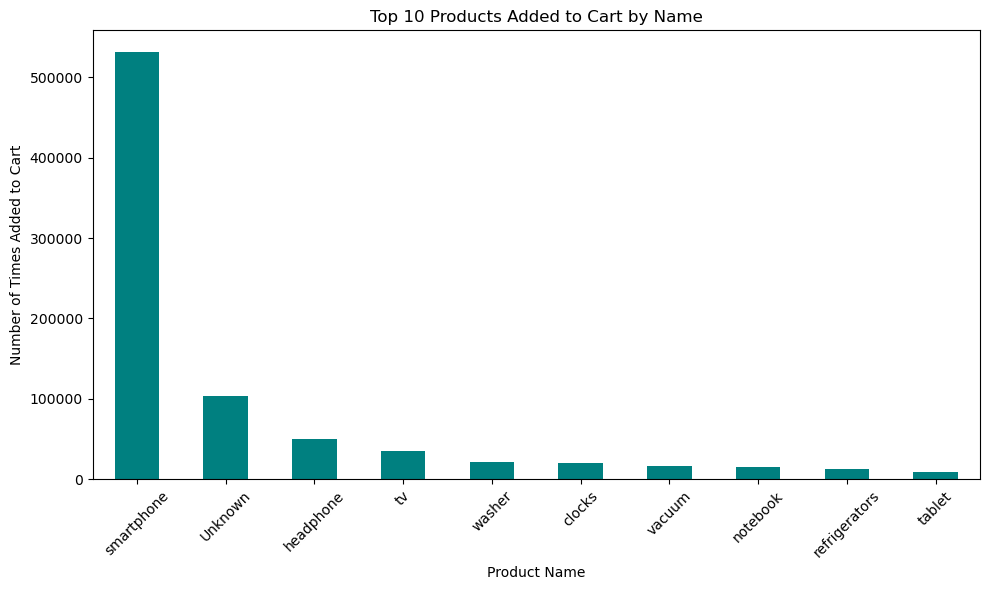

Top 10 Products Added to Cart by Name:
Product_name
smartphone       532007
Unknown          102980
headphone         49886
tv                35029
washer            20873
clocks            19961
vacuum            16721
notebook          15220
refrigerators     12702
tablet             8809
Name: count, dtype: int64


In [171]:
cart_events = data[data['event_type'] == 'cart']

# Calculate top 10 products added to cart 
top_cart_products = cart_events['Product_name'].value_counts().nlargest(10).compute()

# Plotting the top 10 products added to cart 
plt.figure(figsize=(10, 6))
top_cart_products.plot(kind='bar', color='teal')
plt.title('Top 10 Products Added to Cart by Name')
plt.xlabel('Product Name')
plt.ylabel('Number of Times Added to Cart')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Print the results
print("Top 10 Products Added to Cart by Name:")
print(top_cart_products)

Top 10 Most Purchased Products in October 2019

Top 10 most purchased products and their purchase numbers:
Product_name
smartphone       337979
Unknown          173411
headphone         30501
tv                21561
clocks            17903
washer            16146
notebook          15588
vacuum            12378
refrigerators     11218
tablet             5602
dtype: int64


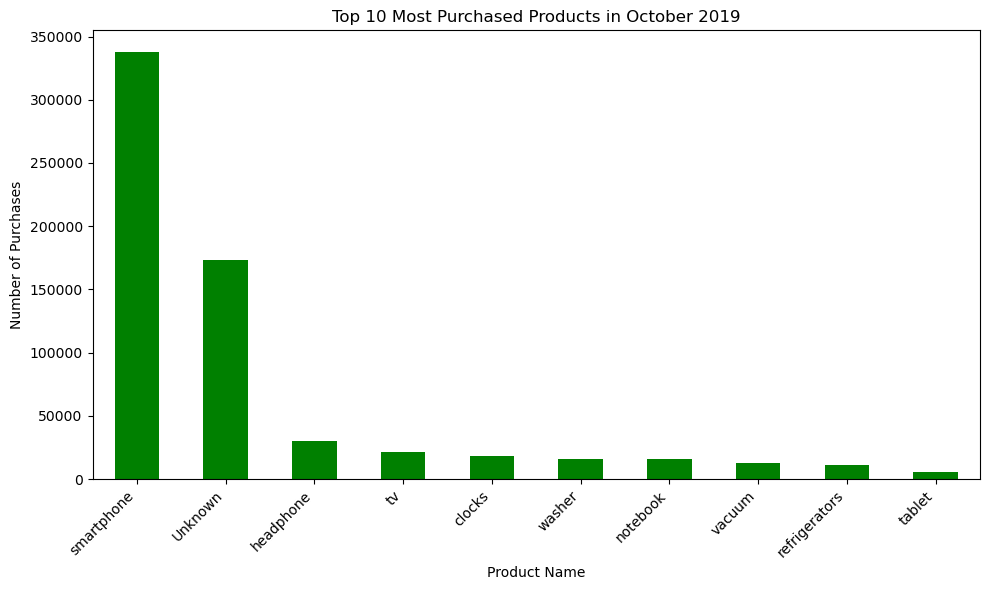

In [172]:
# Filter for 'purchase' events
purchase_data = df[df['event_type'] == 'purchase']

# Group by product name and count the number of purchases for each product
product_purchases = purchase_data.groupby('Product_name').size().sort_values(ascending=False)

# Get the top 10 most purchased products
top_10_purchased_products = product_purchases.head(10)

# Print the top 10 purchased products and their purchase numbers
print("Top 10 most purchased products and their purchase numbers:")
print(top_10_purchased_products)

# Plotting the results
plt.figure(figsize=(10, 6))
top_10_purchased_products.plot(kind='bar', color='green')
plt.title('Top 10 Most Purchased Products in October 2019')
plt.xlabel('Product Name')
plt.ylabel('Number of Purchases')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Average Sales Per Hour for Selected Product Categories (October 2019

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Average sales per hour in October 2019:
Smartphone: 454.27
Unknown: 233.08
Headphone: 41.00
Tv: 28.98
Clocks: 24.06
Washer: 21.70
Notebook: 20.95
Vacuum: 16.64
Refrigerators: 15.08
Tablet: 7.53


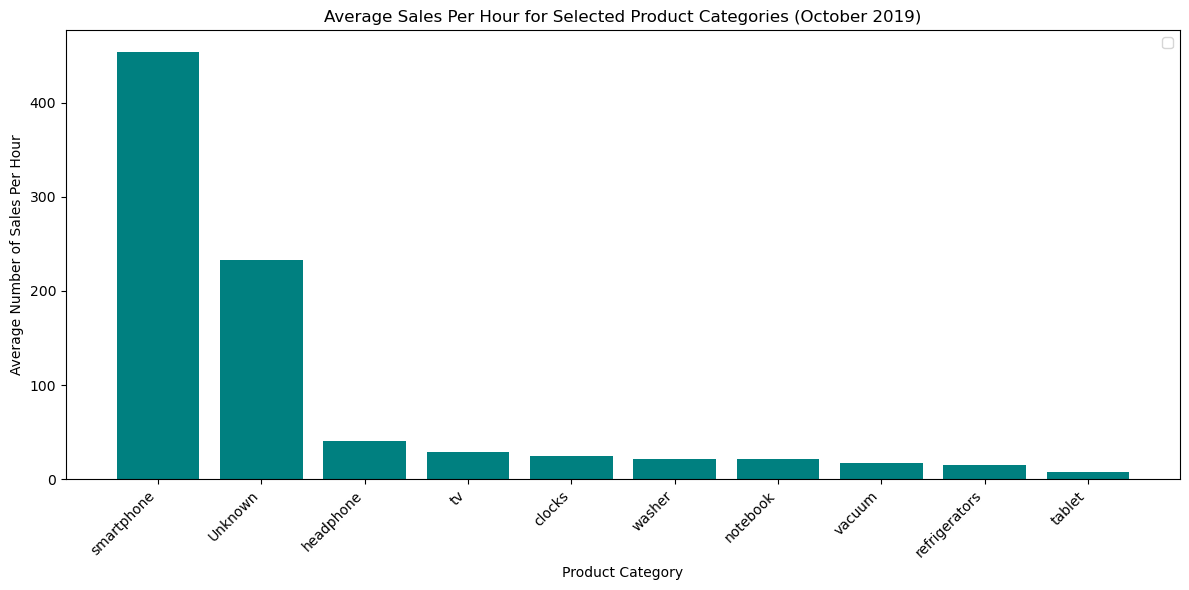

In [178]:
# Define the product categories to analyze
product_categories = [
    'smartphone', 'Unknown', 'headphone', 'tv', 
    'clocks', 'washer', 'notebook', 
    'vacuum', 'refrigerators', 'tablet'
]

# Initialize a dictionary to hold average sales per hour
average_sales_per_hour = {}

# Calculate total number of hours in October 2019 (31 days * 24 hours)
total_hours_in_october = 31 * 24

# Calculate the average number of sales per hour for each product category
for category in product_categories:
    category_sales = october_purchases[october_purchases['Product_name'].str.lower() == category.lower()]
    average_sales_per_hour[category] = category_sales.shape[0] / total_hours_in_october

# Print the average sales per hour for each category
print("Average sales per hour in October 2019:")
for category, avg_sales in average_sales_per_hour.items():
    print(f"{category.capitalize()}: {avg_sales:.2f}")

# Plotting the results
plt.figure(figsize=(12, 6))
plt.bar(average_sales_per_hour.keys(), average_sales_per_hour.values(), color='teal')
#plt.axhline(y=998.6, color='red', linestyle='--', label='Average Order Placed: 998.6 Orders')
plt.title('Average Sales Per Hour for Selected Product Categories (October 2019)')
plt.xlabel('Product Category')
plt.ylabel('Average Number of Sales Per Hour')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()

10 Lowest-Selling Products in October 2019 and Their Purchase Numbers

In [179]:
# Group by product name and count the number of purchases for each product
product_purchases = october_purchases.groupby('Product_name').size().sort_values()

# Get the 10 lowest-selling products
lowest_10_products = product_purchases.head(10)

# Print the 10 lowest-selling products and their purchase numbers
print("10 Lowest-Selling Products in October 2019 and Their Purchase Numbers:")
for product_name, purchases in lowest_10_products.items():
    print(f"{product_name}: {purchases} purchases")

10 Lowest-Selling Products in October 2019 and Their Purchase Numbers:
jacket: 1 purchases
soldering: 1 purchases
shorts: 2 purchases
jumper: 2 purchases
skirt: 4 purchases
snowboard: 6 purchases
slipons: 8 purchases
tennis: 9 purchases
scarf: 10 purchases
ballet_shoes: 11 purchases


In [180]:
# Filter for purchase events
purchase_data = df[df['event_type'] == 'purchase']

# Calculate the total count of purchases
total_purchases = purchase_data.shape[0]

# Print the total number of purchases
print(f"Total count of purchases (sales transactions) in October 2019: {total_purchases}")

Total count of purchases (sales transactions) in October 2019: 742773


In [181]:

october_purchases['hour'] = october_purchases['event_time'].dt.hour

# Group by hour and count the number of purchases per hour
purchases_per_hour = october_purchases.groupby('hour').size()

# Calculate the total number of hours in October 2019 (31 days * 24 hours = 744 hours)
total_hours_in_october = 31 * 24

# Calculate the average number of sales per hour
average_sales_per_hour = purchases_per_hour.sum() / total_hours_in_october

# Print the average number of sales per hour
print(f"Average number of sales per hour in October 2019: {average_sales_per_hour:.2f}")

Average number of sales per hour in October 2019: 998.35


**Brand Analysis**

Total number of unique brands in Oct 2019

In [193]:
# Calculate the total number of unique brands
total_unique_brands = df['brand'].nunique()

# Print the total number of unique brands
print(f"Total number of unique brands in the dataset: {total_unique_brands}")

Total number of unique brands in the dataset: 1984


Top 10 Viewed Brands by Name (in Millions) in Oct 2019

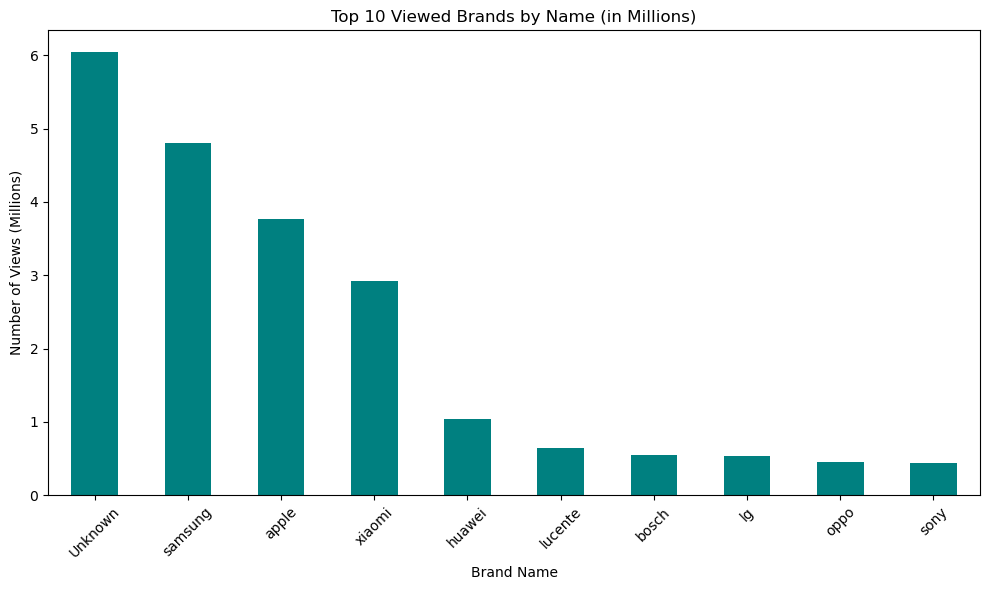

Top 10 Viewed Brands by Name (in Millions):
brand
Unknown    6.038974
samsung    4.805678
apple      3.769841
xiaomi     2.922092
huawei     1.045367
lucente    0.644157
bosch      0.544191
lg         0.540064
oppo       0.451382
sony       0.439800
Name: count, dtype: float64


In [188]:
# Filter for 'view' events
views = data[data['event_type'] == 'view']

# Calculate top 10 viewed brands by name
top_brands = views['brand'].value_counts().nlargest(10).compute()

# Convert the view counts to millions
top_brands_in_millions = top_brands / 1e6

# Plotting the top 10 viewed brands by name in millions
plt.figure(figsize=(10, 6))
top_brands_in_millions.plot(kind='bar', color='teal')
plt.title('Top 10 Viewed Brands by Name (in Millions)')
plt.xlabel('Brand Name')
plt.ylabel('Number of Views (Millions)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Print the results in millions
print("Top 10 Viewed Brands by Name (in Millions):")
print(top_brands_in_millions)

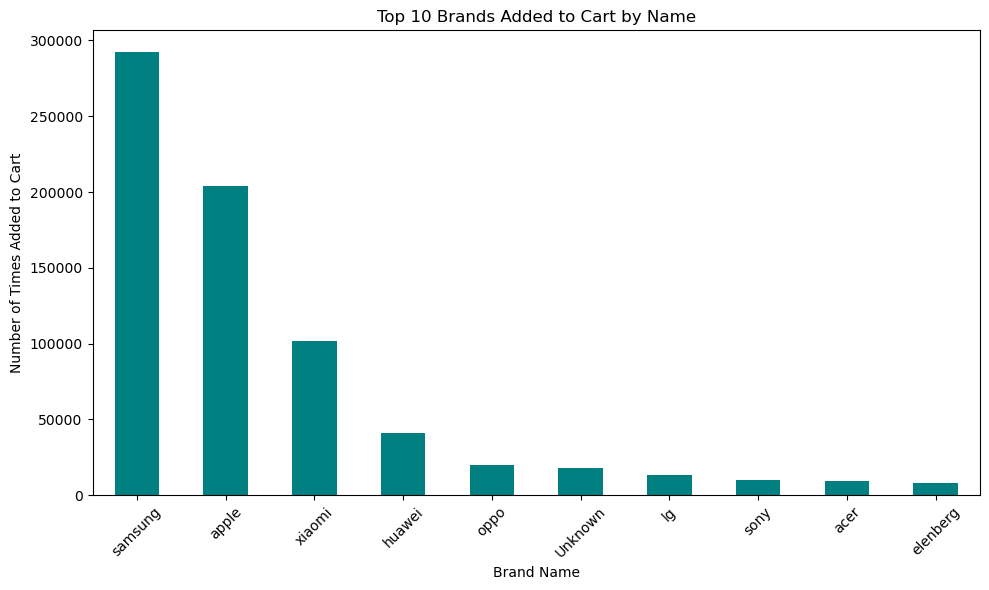

Top 10 Brands Added to Cart by Name:
brand
samsung     292039
apple       203757
xiaomi      101951
huawei       40753
oppo         19825
Unknown      18180
lg           13061
sony          9861
acer          9153
elenberg      8301
Name: count, dtype: int64


In [190]:
# Filter for 'cart' events
carts = data[data['event_type'] == 'cart']

# Calculate top 10 brands added to cart by name
top_brands_cart = carts['brand'].value_counts().nlargest(10).compute()

# Convert the cart counts to millions
top_brands_cart_in_millions = top_brands_cart 

# Plotting the top 10 brands added to cart by name in millions
plt.figure(figsize=(10, 6))
top_brands_cart_in_millions.plot(kind='bar', color='teal')
plt.title('Top 10 Brands Added to Cart by Name')
plt.xlabel('Brand Name')
plt.ylabel('Number of Times Added to Cart')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Print the results in millions
print("Top 10 Brands Added to Cart by Name:")
print(top_brands_cart_in_millions)

Top 10 Brands Added to Cart 

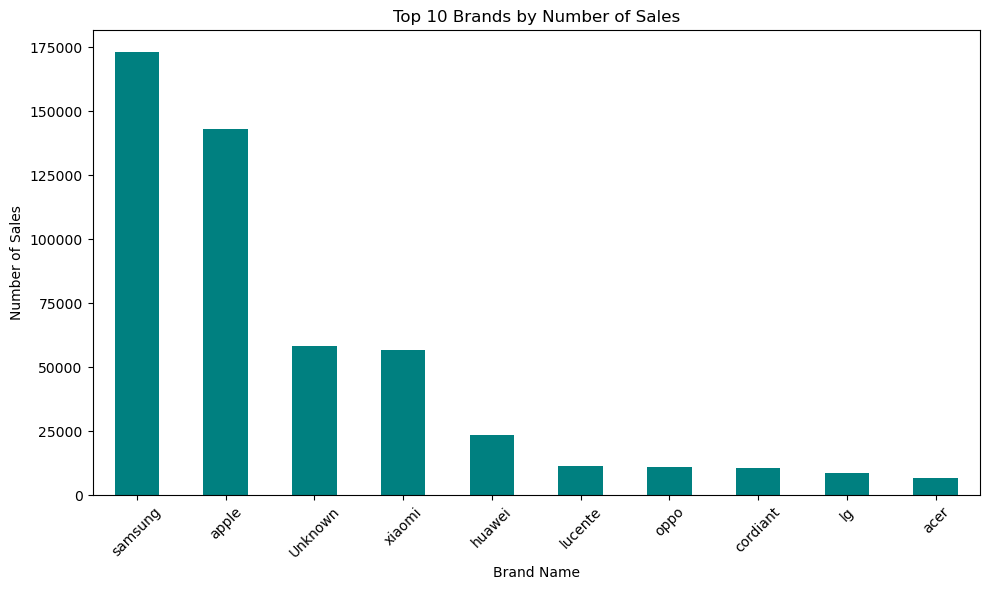

Top 10 Brands by Number of Sales:
brand
samsung     172878
apple       142858
Unknown      58301
xiaomi       56609
huawei       23499
lucente      11576
oppo         10887
cordiant     10551
lg            8725
acer          6880
Name: count, dtype: int64


In [191]:
# Filter for 'purchase' events
sales = data[data['event_type'] == 'purchase']

# Calculate top 10 brands by the number of purchases (sales)
top_brands_sales = sales['brand'].value_counts().nlargest(10).compute()

# Plotting the top 10 brands by the number of purchases
plt.figure(figsize=(10, 6))
top_brands_sales.plot(kind='bar', color='teal')
plt.title('Top 10 Brands by Number of Sales')
plt.xlabel('Brand Name')
plt.ylabel('Number of Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Print the results
print("Top 10 Brands by Number of Sales:")
print(top_brands_sales)

Print the average number of purchases per hour for each brand

In [192]:
# List of top 10 brands to analyze
top_10_brands = ['samsung', 'apple', 'unknown', 'xiaomi', 'huawei', 'lucente', 'oppo', 'cordiant', 'lg', 'acer']

# Initialize a dictionary to store the average purchases per hour for each brand
average_purchases_per_hour = {}

# Calculate the total number of unique hours in the dataset
total_hours = len(df['event_time'].dt.floor('H').unique())

# Calculate the average purchases per hour for each brand
for brand in top_10_brands:
    # Filter for purchase events specifically for the current brand
    brand_purchases = df[(df['event_type'] == 'purchase') & (df['brand'].str.lower() == brand)]
    
    # Group by hour and count the number of purchases per hour
    purchases_per_hour = brand_purchases.groupby(brand_purchases['event_time'].dt.hour).size()
    
    # Calculate the average number of purchases per hour for this brand
    average_purchases_per_hour[brand.capitalize()] = purchases_per_hour.sum() / total_hours

# Print the average number of purchases per hour for each brand
print("Average number of purchases per hour for top 10 brands:")
for brand, avg_purchases in average_purchases_per_hour.items():
    print(f"{brand}: {avg_purchases:.2f} purchases/hour")

Average number of purchases per hour for top 10 brands:
Samsung: 232.68 purchases/hour
Apple: 192.27 purchases/hour
Unknown: 78.47 purchases/hour
Xiaomi: 76.19 purchases/hour
Huawei: 31.63 purchases/hour
Lucente: 15.58 purchases/hour
Oppo: 14.65 purchases/hour
Cordiant: 14.20 purchases/hour
Lg: 11.74 purchases/hour
Acer: 9.26 purchases/hour


10 Lowest-Selling Brands and Their Purchase Numbers

In [195]:
# Group by brand and count the number of purchases for each brand
brand_sales = purchase_data.groupby('brand').size().sort_values()

# Get the 10 lowest-selling brands
lowest_10_brands = brand_sales.head(10)

# Print the 10 lowest-selling brands and their purchase numbers
print("10 Lowest-Selling Brands and Their Purchase Numbers:")
for brand, sales in lowest_10_brands.items():
    print(f"{brand}: {sales} purchases")

10 Lowest-Selling Brands and Their Purchase Numbers:
kleancolor: 1 purchases
lahn: 1 purchases
borasco: 1 purchases
lefard: 1 purchases
bombcat: 1 purchases
libbey: 1 purchases
libero: 1 purchases
listvig: 1 purchases
blumarine: 1 purchases
bluedio: 1 purchases


In [197]:
# Filter for purchase events
purchases = df[df['event_type'] == 'purchase']

# Extract the hour from the event_time
purchases['hour'] = purchases['event_time'].dt.hour

# Group by brand and hour, then count the number of purchases
brand_hourly_sales = purchases.groupby(['brand', 'hour']).size().reset_index(name='purchases')

# Calculate the total number of hours in the dataset (considering unique hours)
total_hours = len(df['event_time'].dt.floor('H').unique())

# Calculate the average purchases per hour for each brand
average_purchases_per_hour = brand_hourly_sales.groupby('brand')['purchases'].sum() / total_hours

# Count brands with less than 9 average purchases per hour
brands_less_than_9 = average_purchases_per_hour[average_purchases_per_hour < 9].count()

# Count brands with less than 4.5 average purchases per hour
brands_less_than_4_5 = average_purchases_per_hour[average_purchases_per_hour < 4.5].count()

# Print the results
print(f"Total count of brands having less than 9 average purchases per hour: {brands_less_than_9}")
print(f"Total count of brands having less than 4.5 average purchases per hour: {brands_less_than_4_5}")

Total count of brands having less than 9 average purchases per hour: 1973
Total count of brands having less than 4.5 average purchases per hour: 1959


Average number of purchases per hour for top 10 brands

In [215]:
# List of top 10 brands to analyze
top_10_brands = ['samsung', 'apple', 'unknown', 'xiaomi', 'huawei', 'lucente', 'oppo', 'cordiant', 'lg', 'acer','sony', 'elenberg','artel','triangle','bosch', 'indesit' ]

# Initialize a dictionary to store the average purchases per hour for each brand
average_purchases_per_hour = {}

# Calculate the total number of unique hours in the dataset
total_hours = len(df['event_time'].dt.floor('H').unique())

# Calculate the average purchases per hour for each brand
for brand in top_10_brands:
    # Filter for purchase events specifically for the current brand
    brand_purchases = df[(df['event_type'] == 'purchase') & (df['brand'].str.lower() == brand)]
    
    # Group by hour and count the number of purchases per hour
    purchases_per_hour = brand_purchases.groupby(brand_purchases['event_time'].dt.hour).size()
    
    # Calculate the average number of purchases per hour for this brand
    average_purchases_per_hour[brand.capitalize()] = purchases_per_hour.sum() / total_hours

# Print the average number of purchases per hour for each brand
print("Average number of purchases per hour for top X brands:")
for brand, avg_purchases in average_purchases_per_hour.items():
    print(f"{brand}: {avg_purchases:.2f} purchases/hour")

Average number of purchases per hour for top X brands:
Samsung: 232.36 purchases/hour
Apple: 192.01 purchases/hour
Unknown: 78.36 purchases/hour
Xiaomi: 76.09 purchases/hour
Huawei: 31.58 purchases/hour
Lucente: 15.56 purchases/hour
Oppo: 14.63 purchases/hour
Cordiant: 14.18 purchases/hour
Lg: 11.73 purchases/hour
Acer: 9.25 purchases/hour
Sony: 9.04 purchases/hour
Elenberg: 8.32 purchases/hour
Artel: 8.23 purchases/hour
Triangle: 7.84 purchases/hour
Bosch: 7.67 purchases/hour
Indesit: 6.75 purchases/hour


Brand-wise Distribution of Total Purchases in Oct 2019

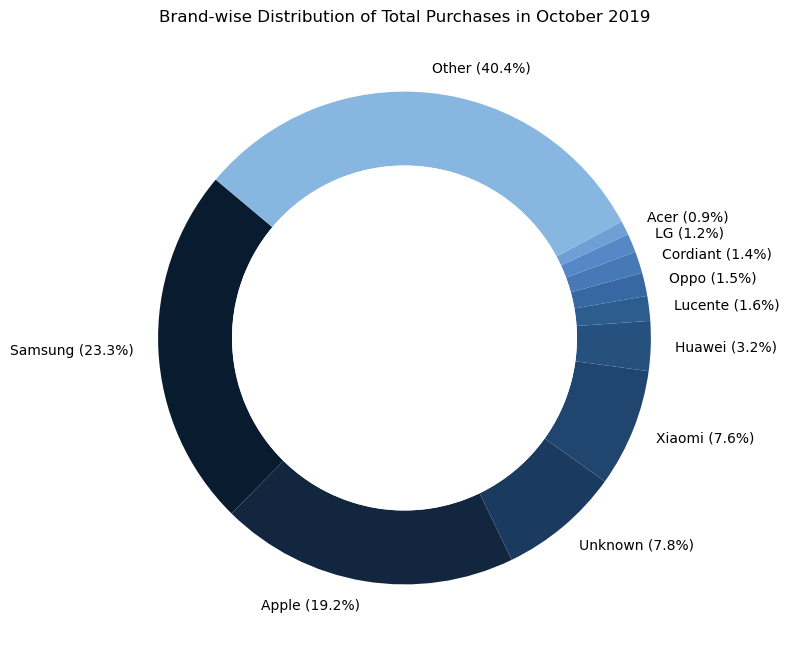

In [11]:
# Correcting the mismatch in the number of labels and percentages

# Adjusted labels to include the percentages
labels = [
    'Samsung (23.3%)', 'Apple (19.2%)', 'Unknown (7.8%)', 'Xiaomi (7.6%)', 'Huawei (3.2%)', 
    'Lucente (1.6%)', 'Oppo (1.5%)', 'Cordiant (1.4%)', 'LG (1.2%)', 'Acer (0.9%)', 'Other (40.4%)'
]

# Corrected the percentages to match the labels
sales_percentages = [
    23.3, 19.2, 7.8, 7.6, 3.2, 
    1.6, 1.5, 1.4, 1.2, 0.9, 30.5
]

# Creating the donut chart
plt.figure(figsize=(10, 8))
wedges, texts, autotexts = plt.pie(sales_percentages, labels=labels, startangle=140, colors=colors, autopct='%1.1f%%', wedgeprops=dict(width=0.3))

# Customize the autotexts
for autotext in autotexts:
    autotext.set_color('white')  # Set the color of the percentage text
    autotext.set_fontsize(10)    # Set the font size of the percentage text

# Adding a circle at the center to create a donut shape
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Adding a title
plt.title('Brand-wise Distribution of Total Purchases in October 2019')

# Display the donut chart
plt.show()


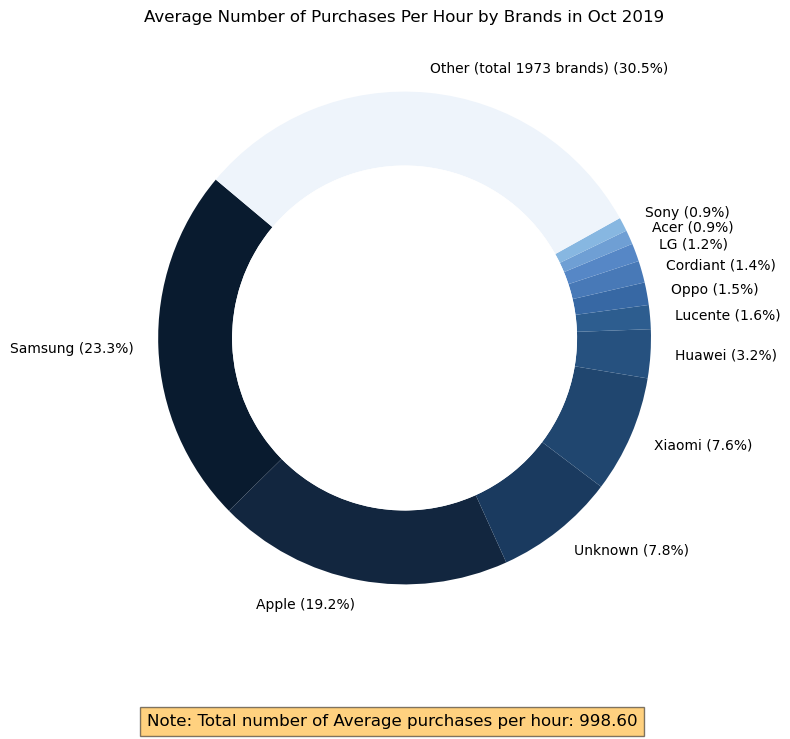

In [10]:
import matplotlib.pyplot as plt

# Data for the pie (donut) chart
labels = [
    'Samsung (23.3%)', 'Apple (19.2%)', 'Unknown (7.8%)', 'Xiaomi (7.6%)', 'Huawei (3.2%)', 
    'Lucente (1.6%)', 'Oppo (1.5%)', 'Cordiant (1.4%)', 'LG (1.2%)', 'Acer (0.9%)', 'Sony (0.9%)', 'Other (total 1973 brands) (30.5%)'
]

sizes = [
    232.36, 192.01, 78.36, 76.09, 31.58, 
    15.56, 14.63, 14.18, 11.73, 9.25, 9.04, 304.81  # 304.81 is the sum of all brands with less than 9 purchases/hour
]

# Specified colors: Darkest to lightest blue for brands and lightest blue for 'Other'
colors = ['#091b2f', '#12263f', '#1a3a5f', '#20466f', '#26517f', 
          '#2d5d8f', '#3768a4', '#4879b7', '#5687c6', '#6f9fd4', 
          '#87b7e1', '#eef4fb']  # Lightest blue for 'Other'

# Creating the donut chart
plt.figure(figsize=(10, 8))
wedges, texts = plt.pie(sizes, labels=labels, startangle=140, colors=colors, wedgeprops=dict(width=0.3))

# Adding a circle at the center to create a donut shape
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Adding a note at the bottom
plt.figtext(0.5, 0.01, "Note: Total number of Average purchases per hour: 998.60", ha="center", fontsize=12, bbox={"facecolor":"orange", "alpha":0.5, "pad":5})

# Display the donut chart
plt.title('Average Number of Purchases Per Hour by Brands in Oct 2019')
plt.show()


# Nov-2019

Average number of views per hour in November 2019 Average number of purchases in 2019

In [224]:
import dask.dataframe as dd

# Load the dataset using Dask
data = dd.read_csv('Nov_2019_final_cleanXX.csv', parse_dates=['event_time'])

# Ensure 'event_time' is a datetime object
data['event_time'] = dd.to_datetime(data['event_time']).dt.tz_localize(None)

# Filter for November 2019 data
november_data = data[data['event_time'].dt.month == 11]

# 1. Total number of views (in million) for November 2019
total_views = november_data[november_data['event_type'] == 'view'].shape[0].compute() / 1e6
print(f"Total number of views in November 2019 (in millions): {total_views:.2f} million")

# 2. Average number of views (in million) per hour for November 2019
total_hours = november_data['event_time'].dt.floor('H').nunique().compute()
average_views_per_hour = total_views / total_hours
print(f"Average number of views per hour in November 2019 (in millions): {average_views_per_hour:.6f} million/hour")

# 3. Total count of purchases (Not amount) for November 2019
total_purchases = november_data[november_data['event_type'] == 'purchase'].shape[0].compute()
print(f"Total number of purchases in November 2019: {total_purchases}")

# 4. Average number of purchases (Not amount) per hour for November 2019
average_purchases_per_hour = total_purchases / total_hours
print(f"Average number of purchases per hour in November 2019: {average_purchases_per_hour:.2f} purchases/hour")

# 5. Average order value for November 2019
total_purchase_amount = november_data[november_data['event_type'] == 'purchase']['price'].sum().compute()
average_order_value = total_purchase_amount / total_purchases
print(f"Average order value in November 2019: ${average_order_value:.2f}")


Total number of views in November 2019 (in millions): 63.55 million
Average number of views per hour in November 2019 (in millions): 0.088257 million/hour
Total number of purchases in November 2019: 916930
Average number of purchases per hour in November 2019: 1273.51 purchases/hour
Average order value in November 2019: $300.12


In [229]:
import dask.dataframe as dd

# Load the dataset using Dask
data = dd.read_csv('Nov_2019_final_cleanXX.csv', parse_dates=['event_time'])

# Filter for November 2019 data
november_data = data[data['event_time'].dt.month == 11]

# 1. Total number of sessions (assuming each row is a unique session)
total_sessions = november_data.shape[0].compute()

# 2. Number of Add-to-Cart Sessions
add_to_cart_sessions = november_data[november_data['event_type'] == 'cart'].shape[0].compute()

# 3. Calculate Add-to-Cart Conversion Rate (%)
add_to_cart_conversion_rate = (add_to_cart_sessions / total_sessions) * 100

# 4. Calculate Number of Completed Purchases
number_of_completed_purchases = november_data[november_data['event_type'] == 'purchase'].shape[0].compute()

# 5. Calculate Number of Carts Created
number_of_carts_created = november_data[november_data['event_type'] == 'cart'].shape[0].compute()

# 6. Calculate Shopping Cart Conversion Rate
if number_of_carts_created > 0:
    shopping_cart_conversion_rate = (number_of_completed_purchases / number_of_carts_created) * 100
else:
    shopping_cart_conversion_rate = 0  # Prevent division by zero

# Print the results
print(f"Total Number of Sessions in November 2019: {total_sessions}")
print(f"Number of Add-to-Cart Sessions in November 2019: {add_to_cart_sessions}")
print(f"Add-to-Cart Conversion Rate (%): {add_to_cart_conversion_rate:.2f}%")

print(f"Number of Completed Purchases in November 2019: {number_of_completed_purchases}")
print(f"Number of Carts Created in November 2019: {number_of_carts_created}")
print(f"Shopping Cart Conversion Rate (%): {shopping_cart_conversion_rate:.2f}%")


Total Number of Sessions in November 2019: 67392131
Number of Add-to-Cart Sessions in November 2019: 2930018
Add-to-Cart Conversion Rate (%): 4.35%
Number of Completed Purchases in November 2019: 916930
Number of Carts Created in November 2019: 2930018
Shopping Cart Conversion Rate (%): 31.29%


Top 10 Viewed and Purchased Brands in November 2019

Top 10 Viewed Brands in November 2019:
brand
Unknown    8890440
samsung    7090753
apple      5602520
xiaomi     4309177
huawei     1312501
lucente    1131349
lg         1034643
bosch       936479
sony        753094
oppo        751926
Name: count, dtype: int64

Top 10 Purchased Brands in November 2019:
brand
samsung     200026
apple       166064
Unknown      73361
xiaomi       68291
huawei       23703
cordiant     16983
oppo         15080
lucente      14557
lg           12879
sony         10309
Name: count, dtype: int64


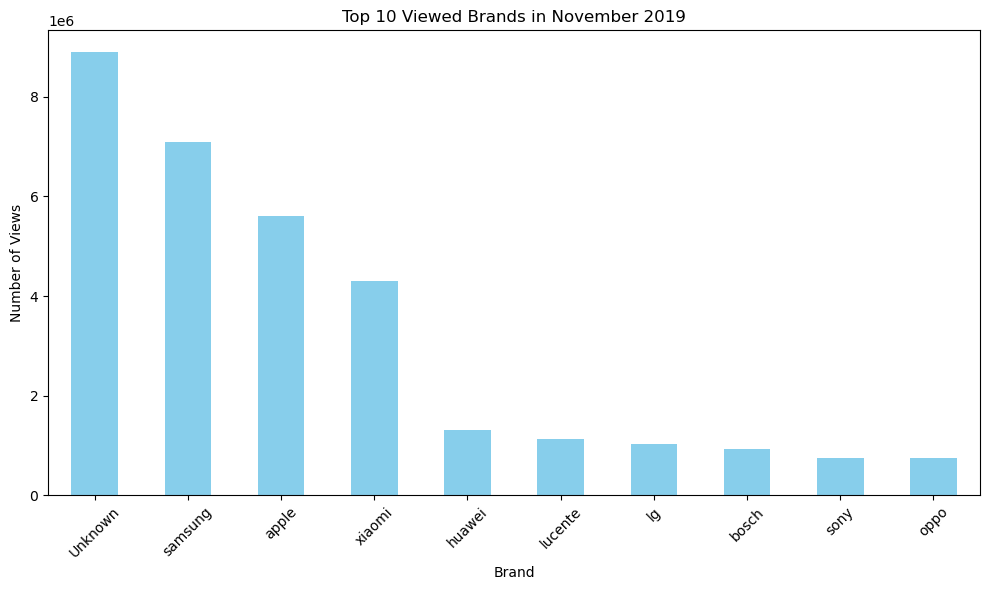

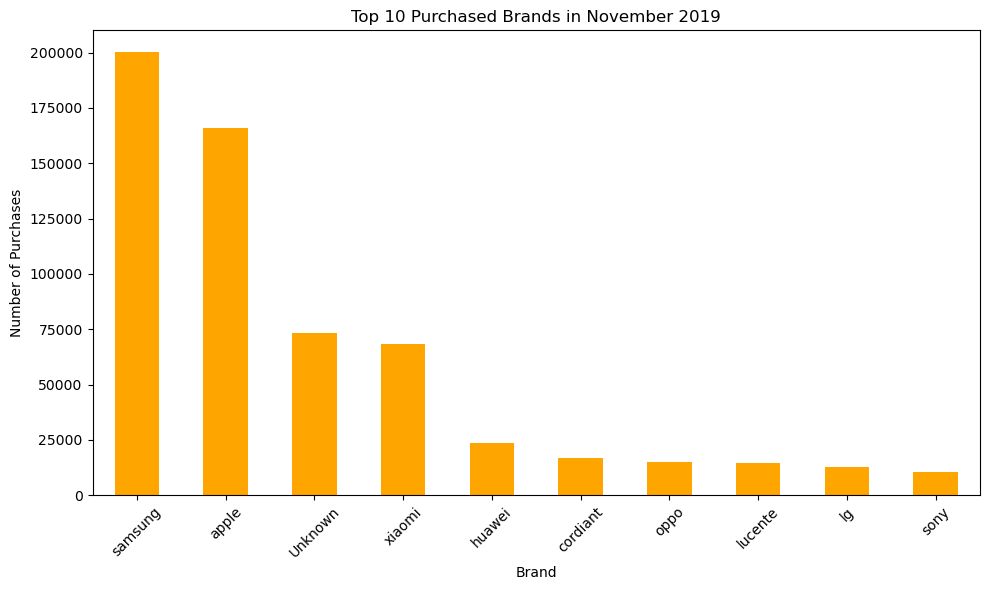

In [233]:

# 1. Top 10 viewed brands
top_viewed_brands = november_data[november_data['event_type'] == 'view']['brand'].value_counts().nlargest(10).compute()

# 2. Top 10 purchased brands
top_purchased_brands = november_data[november_data['event_type'] == 'purchase']['brand'].value_counts().nlargest(10).compute()

# Print the results
print("Top 10 Viewed Brands in November 2019:")
print(top_viewed_brands)

print("\nTop 10 Purchased Brands in November 2019:")
print(top_purchased_brands)

# Plotting the results

# Plot Top 10 Viewed Brands
plt.figure(figsize=(10, 6))
top_viewed_brands.plot(kind='bar', color='skyblue')
plt.title('Top 10 Viewed Brands in November 2019')
plt.xlabel('Brand')
plt.ylabel('Number of Views')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plot Top 10 Purchased Brands
plt.figure(figsize=(10, 6))
top_purchased_brands.plot(kind='bar', color='orange')
plt.title('Top 10 Purchased Brands in November 2019')
plt.xlabel('Brand')
plt.ylabel('Number of Purchases')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Brand-wise Distribution of Total Purchases in November 2019

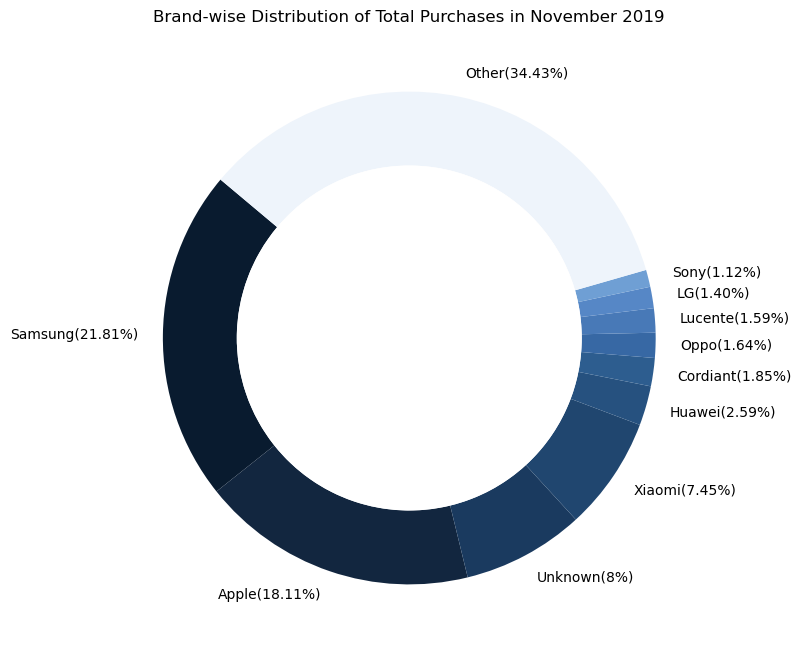

In [9]:
import matplotlib.pyplot as plt

# Data for the donut chart
labels = ['Samsung(21.81%)', 'Apple(18.11%)', 'Unknown(8%)', 'Xiaomi(7.45%)', 'Huawei(2.59%)', 'Cordiant(1.85%)', 
          'Oppo(1.64%)', 'Lucente(1.59%)', 'LG(1.40%)', 'Sony(1.12%)', 'Other(34.43%)']
sizes = [21.81, 18.11, 8.00, 7.45, 2.59, 1.85, 1.64, 1.59, 1.40, 1.12, 34.43]

# Specified colors
colors = ['#091b2f', '#12263f', '#1a3a5f', '#20466f', '#26517f', 
          '#2d5d8f', '#3768a4', '#4879b7', '#5687c6', '#6f9fd4', 
          '#eef4fb']  # Lightest blue for 'Other'

# Creating the donut chart
plt.figure(figsize=(8, 8))
wedges, texts, autotexts = plt.pie(sizes, labels=labels, colors=colors, startangle=140, 
                                   autopct='%1.1f%%', wedgeprops=dict(width=0.3))

# Customize the autotexts
for autotext in autotexts:
    autotext.set_color('white')  # Set the color of the percentage text
    autotext.set_fontsize(10)    # Set the font size of the percentage text

# Adding a circle at the center to create a donut shape
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Adding a title
plt.title('Brand-wise Distribution of Total Purchases in November 2019')

# Display the donut chart
plt.show()


Average number of views per hour in November 2019 Average number of purchases in Dec 2019

In [225]:
import dask.dataframe as dd

# Load the dataset using Dask
data = dd.read_csv('Dec_2019_replcedXXX.csv', parse_dates=['event_time'])

# Filter for December 2019 data
december_data = data[data['event_time'].dt.month == 12]

# 1. Total number of sessions (assuming each row is a unique session)
total_sessions = december_data.shape[0].compute()

# 2. Number of Add-to-Cart Sessions
add_to_cart_sessions = december_data[december_data['event_type'] == 'cart'].shape[0].compute()

# 3. Calculate Add-to-Cart Conversion Rate (%)
add_to_cart_conversion_rate = (add_to_cart_sessions / total_sessions) * 100

# 4. Calculate Number of Completed Purchases
number_of_completed_purchases = december_data[december_data['event_type'] == 'purchase'].shape[0].compute()

# 5. Calculate Number of Carts Created
number_of_carts_created = december_data[december_data['event_type'] == 'cart'].shape[0].compute()

# 6. Calculate Shopping Cart Conversion Rate
if number_of_carts_created > 0:
    shopping_cart_conversion_rate = (number_of_completed_purchases / number_of_carts_created) * 100
else:
    shopping_cart_conversion_rate = 0  # Prevent division by zero

# 7. Calculate Average Order Value for December 2019
total_purchase_amount = december_data[december_data['event_type'] == 'purchase']['price'].sum().compute()
average_order_value = total_purchase_amount / number_of_completed_purchases

# Print the results
print(f"Total Number of Sessions in December 2019: {total_sessions}")
print(f"Number of Add-to-Cart Sessions in December 2019: {add_to_cart_sessions}")
print(f"Add-to-Cart Conversion Rate (%): {add_to_cart_conversion_rate:.2f}%")

print(f"Number of Completed Purchases in December 2019: {number_of_completed_purchases}")
print(f"Number of Carts Created in December 2019: {number_of_carts_created}")
print(f"Shopping Cart Conversion Rate (%): {shopping_cart_conversion_rate:.2f}%")

print(f"Average Order Value in December 2019: ${average_order_value:.2f}")

 

Total Number of Sessions in December 2019: 67542878
Number of Add-to-Cart Sessions in December 2019: 3394763
Add-to-Cart Conversion Rate (%): 5.03%
Number of Completed Purchases in December 2019: 1162048
Number of Carts Created in December 2019: 3394763
Shopping Cart Conversion Rate (%): 34.23%
Average Order Value in December 2019: $296.18


Average number of views per hour in December 2019

In [227]:
# 1. Total number of views in December 2019
total_views = december_data[december_data['event_type'] == 'view'].shape[0].compute()
print(f"Total number of views in December 2019: {total_views}")

# 2. Calculate the total number of unique hours in December 2019
total_hours = december_data['event_time'].dt.floor('H').nunique().compute()

# 3. Average number of views per hour in December 2019
average_views_per_hour = total_views / total_hours
print(f"Average number of views per hour in December 2019: {average_views_per_hour:.2f}")

# 4. Total number of purchases in December 2019
total_purchases = december_data[december_data['event_type'] == 'purchase'].shape[0].compute()

# 5. Average number of purchases per hour in December 2019
average_purchases_per_hour = total_purchases / total_hours
print(f"Average number of purchases per hour in December 2019: {average_purchases_per_hour:.2f}")

Total number of views in December 2019: 62986067
Average number of views per hour in December 2019: 84658.69
Average number of purchases per hour in December 2019: 1561.89


Top 10 viewed and purchased categories & top 10 vied and purchased brands 

Top 10 Viewed Categories in December 2020:
Product_category
construction    16548672
appliances      11078790
apparel          8628700
electronics      7101058
Unknown          6680004
sport            3380116
computers        3224080
furniture        3020643
kids             1686864
accessories       871390
Name: count, dtype: int64

Top 10 Viewed Brands in December 2020:
brand
Unknown    7765049
samsung    7574471
apple      4880397
xiaomi     4766990
huawei     1736478
lucente    1197092
lg          878732
sony        853245
bosch       711264
oppo        703464
Name: count, dtype: int64

Top 10 Purchased Categories in December 2020:
Product_category
construction    522440
appliances      172525
apparel         110018
electronics      92401
Unknown          88016
sport            71139
furniture        36558
computers        34687
kids             17314
auto              7722
Name: count, dtype: int64

Top 10 Purchased Brands in December 2020:
brand
samsung    265941
apple      2095

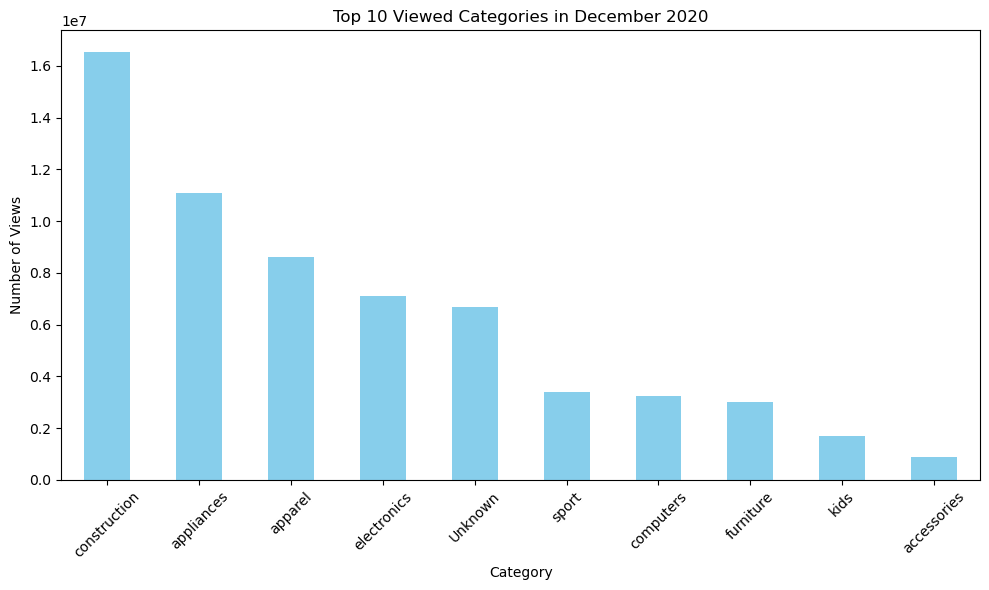

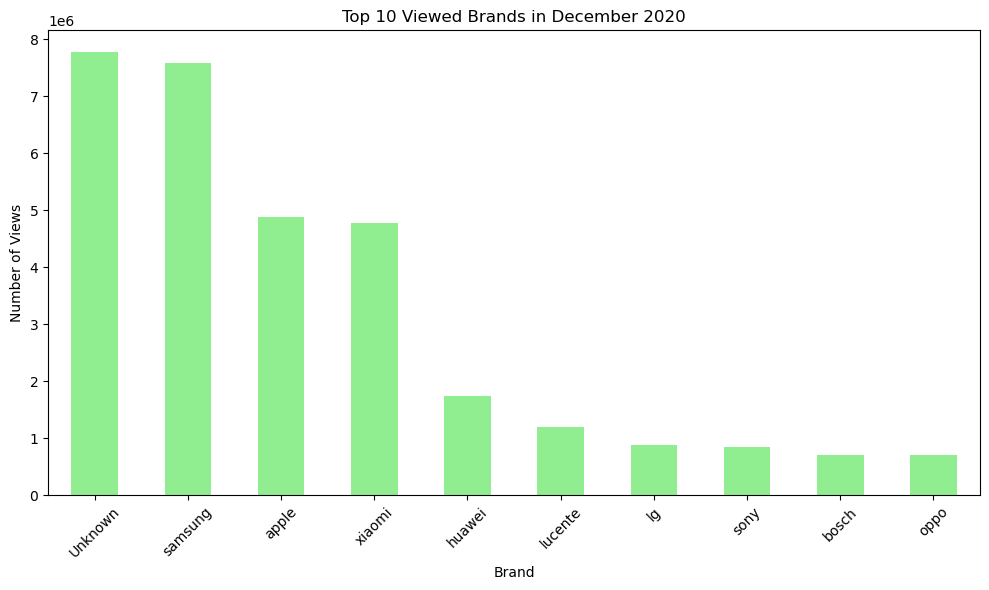

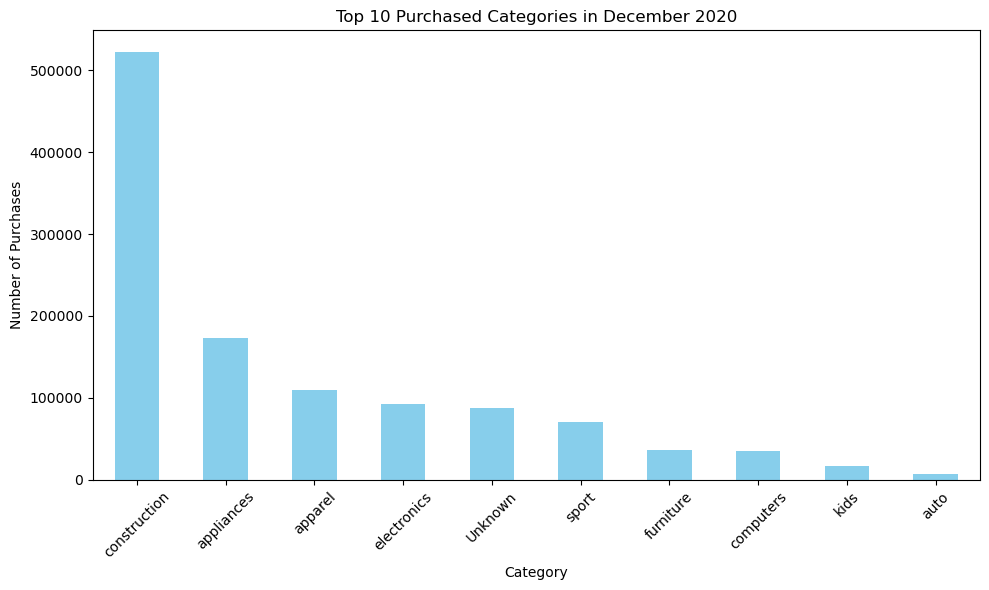

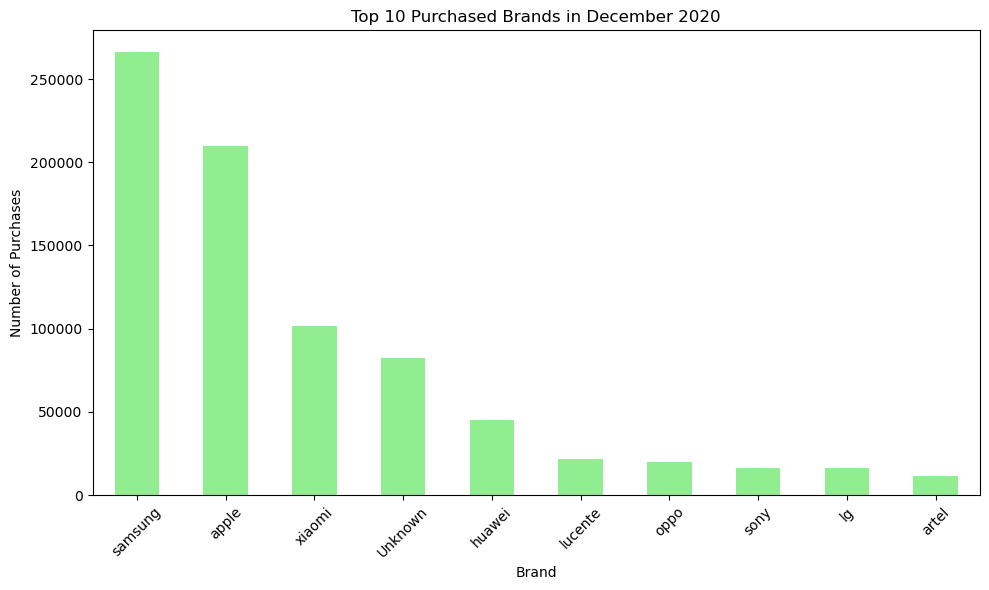

In [228]:
# 1. Top 10 viewed categories
top_viewed_categories = december_data[december_data['event_type'] == 'view']['Product_category'].value_counts().nlargest(10).compute()

# 2. Top 10 viewed brands
top_viewed_brands = december_data[december_data['event_type'] == 'view']['brand'].value_counts().nlargest(10).compute()

# 3. Top 10 purchased categories
top_purchased_categories = december_data[december_data['event_type'] == 'purchase']['Product_category'].value_counts().nlargest(10).compute()

# 4. Top 10 purchased brands
top_purchased_brands = december_data[december_data['event_type'] == 'purchase']['brand'].value_counts().nlargest(10).compute()

# Print the results
print("Top 10 Viewed Categories in December 2020:")
print(top_viewed_categories)

print("\nTop 10 Viewed Brands in December 2020:")
print(top_viewed_brands)

print("\nTop 10 Purchased Categories in December 2020:")
print(top_purchased_categories)

print("\nTop 10 Purchased Brands in December 2020:")
print(top_purchased_brands)

# Plotting the results

# Plot Top 10 Viewed Categories
plt.figure(figsize=(10, 6))
top_viewed_categories.plot(kind='bar', color='skyblue')
plt.title('Top 10 Viewed Categories in December 2020')
plt.xlabel('Category')
plt.ylabel('Number of Views')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plot Top 10 Viewed Brands
plt.figure(figsize=(10, 6))
top_viewed_brands.plot(kind='bar', color='lightgreen')
plt.title('Top 10 Viewed Brands in December 2020')
plt.xlabel('Brand')
plt.ylabel('Number of Views')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plot Top 10 Purchased Categories
plt.figure(figsize=(10, 6))
top_purchased_categories.plot(kind='bar', color='skyblue')
plt.title('Top 10 Purchased Categories in December 2020')
plt.xlabel('Category')
plt.ylabel('Number of Purchases')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plot Top 10 Purchased Brands
plt.figure(figsize=(10, 6))
top_purchased_brands.plot(kind='bar', color='lightgreen')
plt.title('Top 10 Purchased Brands in December 2020')
plt.xlabel('Brand')
plt.ylabel('Number of Purchases')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Brand-wise Distribution of Total Purchases in December 2019

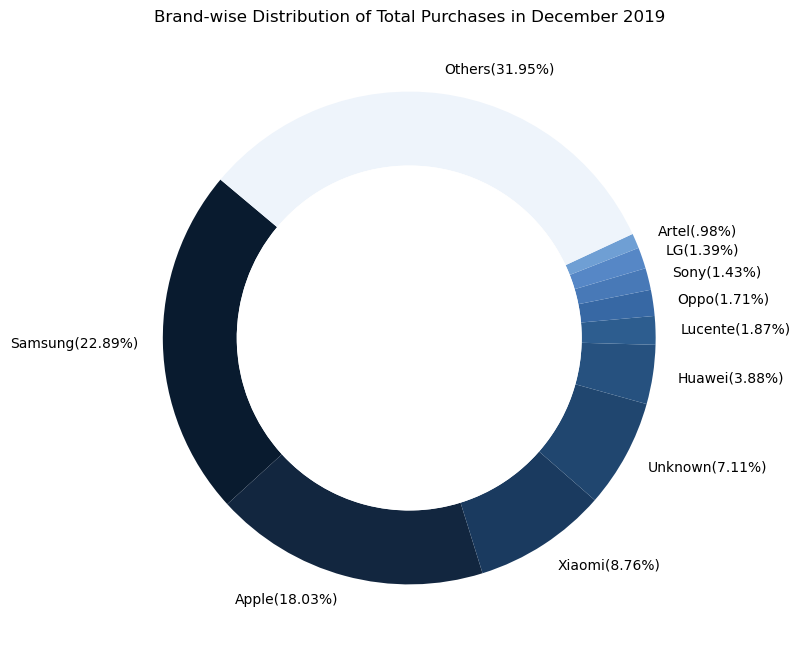

In [8]:
# Adjusting the code to use the specified shades of blue
import matplotlib.pyplot as plt

# Data for the donut chart
labels = ['Samsung(22.89%)', 'Apple(18.03%)', 'Xiaomi(8.76%)', 'Unknown(7.11%)', 'Huawei(3.88%)', 'Lucente(1.87%)', 
          'Oppo(1.71%)', 'Sony(1.43%)', 'LG(1.39%)', 'Artel(.98%)', 'Others(31.95%)']
sizes = [22.89, 18.03, 8.76, 7.11, 3.88, 1.87, 1.71, 1.43, 1.39, 0.98, 31.95]

# Specified colors
colors = ['#091b2f', '#12263f', '#1a3a5f', '#20466f', '#26517f', 
          '#2d5d8f', '#3768a4', '#4879b7', '#5687c6', '#6f9fd4', 
          '#eef4fb']  # Lightest blue for 'Others'

# Creating the donut chart
plt.figure(figsize=(8, 8))
wedges, texts, autotexts = plt.pie(sizes, labels=labels, colors=colors, startangle=140, 
                                   autopct='%1.1f%%', wedgeprops=dict(width=0.3))

# Customize the autotexts
for autotext in autotexts:
    autotext.set_color('white')  # Set the color of the percentage text
    autotext.set_fontsize(10)    # Set the font size of the percentage text

# Adding a circle at the center to create a donut shape
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Adding a title
plt.title('Brand-wise Distribution of Total Purchases in December 2019')

# Display the donut chart
plt.show()

Quarter Analysis ( Oct to Dec 2019 Avg order analysis, cart conversion rate analysis)

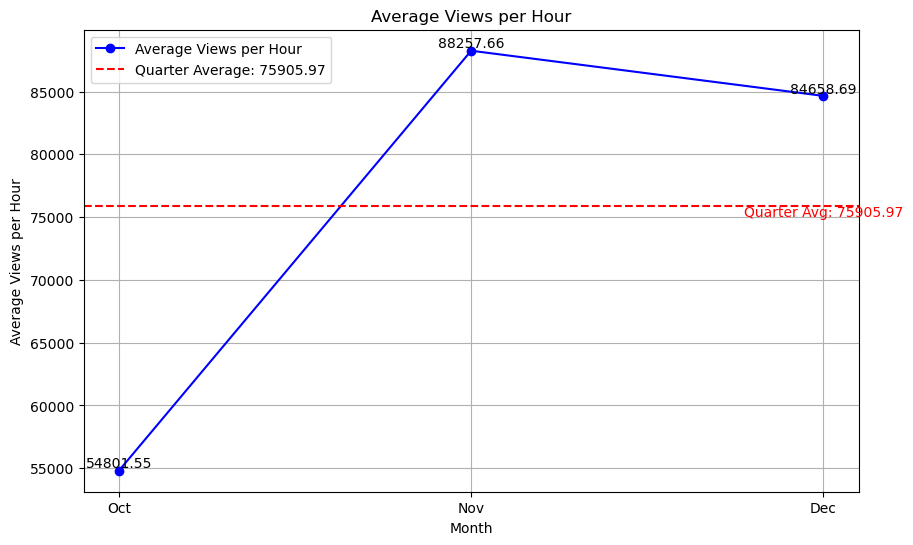

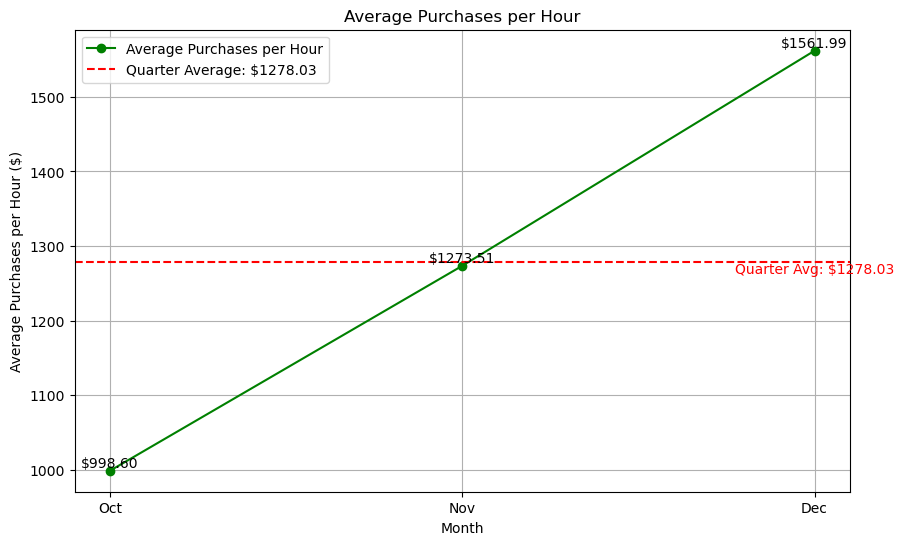

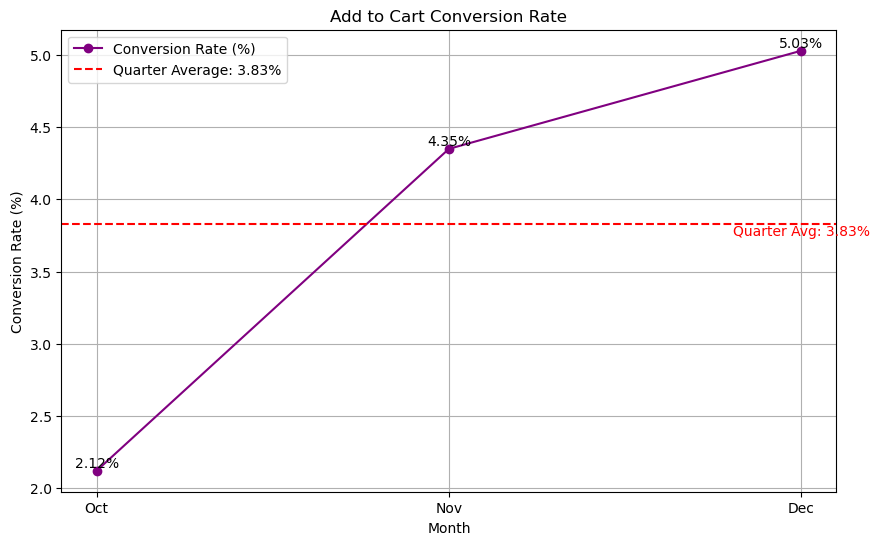

In [231]:
import matplotlib.pyplot as plt

# Data for Average Views per Hour
months = ['Oct', 'Nov', 'Dec']
average_views_per_hour = [54801.55, 88257.66, 84658.69]
average_views_per_hour_quarter = 75905.97

# Data for Average Purchases per Hour
average_purchases_per_hour = [998.60, 1273.51, 1561.99]
average_purchases_per_hour_quarter = 1278.03

# Data for Add to Cart Conversion Rate
conversion_rates = [2.12, 4.35, 5.03]
average_conversion_rate_quarter = 3.83

# Plot for Average Views per Hour
plt.figure(figsize=(10, 6))
plt.plot(months, average_views_per_hour, marker='o', linestyle='-', color='blue', label='Average Views per Hour')
plt.axhline(y=average_views_per_hour_quarter, color='red', linestyle='--', label=f'Quarter Average: {average_views_per_hour_quarter:.2f}')
plt.title('Average Views per Hour')
plt.xlabel('Month')
plt.ylabel('Average Views per Hour')
plt.legend()
plt.grid(True)

# Annotate the points with their values
for i, value in enumerate(average_views_per_hour):
    plt.text(i, value, f'{value:.2f}', ha='center', va='bottom')

# Print the quarter average value
plt.text(len(months)-1, average_views_per_hour_quarter, f'Quarter Avg: {average_views_per_hour_quarter:.2f}', color='red', ha='center', va='top')

plt.show()

# Plot for Average Purchases per Hour
plt.figure(figsize=(10, 6))
plt.plot(months, average_purchases_per_hour, marker='o', linestyle='-', color='green', label='Average Purchases per Hour')
plt.axhline(y=average_purchases_per_hour_quarter, color='red', linestyle='--', label=f'Quarter Average: ${average_purchases_per_hour_quarter:.2f}')
plt.title('Average Purchases per Hour')
plt.xlabel('Month')
plt.ylabel('Average Purchases per Hour ($)')
plt.legend()
plt.grid(True)

# Annotate the points with their values
for i, value in enumerate(average_purchases_per_hour):
    plt.text(i, value, f'${value:.2f}', ha='center', va='bottom')

# Print the quarter average value
plt.text(len(months)-1, average_purchases_per_hour_quarter, f'Quarter Avg: ${average_purchases_per_hour_quarter:.2f}', color='red', ha='center', va='top')

plt.show()

# Plot for Add to Cart Conversion Rate
plt.figure(figsize=(10, 6))
plt.plot(months, conversion_rates, marker='o', linestyle='-', color='purple', label='Conversion Rate (%)')
plt.axhline(y=average_conversion_rate_quarter, color='red', linestyle='--', label=f'Quarter Average: {average_conversion_rate_quarter:.2f}%')
plt.title('Add to Cart Conversion Rate')
plt.xlabel('Month')
plt.ylabel('Conversion Rate (%)')
plt.legend()
plt.grid(True)

# Annotate the points with their values
for i, value in enumerate(conversion_rates):
    plt.text(i, value, f'{value:.2f}%', ha='center', va='bottom')

# Print the quarter average value
plt.text(len(months)-1, average_conversion_rate_quarter, f'Quarter Avg: {average_conversion_rate_quarter:.2f}%', color='red', ha='center', va='top')

plt.show()

**RFM Analysis for Oct 2019**

In [243]:
import dask.dataframe as dd
import pandas as pd


# Load the dataset
df = dd.read_csv('Oct_2019_final_clean.csv', parse_dates=['event_time'])

# Display the first few rows to verify
df.head()


event_time event_type  product_id     brand    price  \
0 2019-10-01 00:00:00+00:00       view    44600062  shiseido    35.79   
1 2019-10-01 00:00:00+00:00       view     3900821      aqua    33.20   
2 2019-10-01 00:00:01+00:00       view    17200506   Unknown   543.10   
3 2019-10-01 00:00:01+00:00       view     1307067    lenovo   251.74   
4 2019-10-01 00:00:04+00:00       view     1004237     apple  1081.98   

     user_id Product_category  Product_name  
0  541312140          Unknown       Unknown  
1  554748717       appliances  water_heater  
2  519107250        furniture          sofa  
3  550050854        computers      notebook  
4  535871217      electronics    smartphone

In [245]:
import pytz

# Convert snapshot_date to the same timezone as event_time
snapshot_date = pd.Timestamp('2019-10-31 23:59:59').tz_localize('UTC')

In [246]:
# Calculate Recency: the number of days since the last purchase
df['days_since_last_purchase'] = df['event_time'].map_partitions(
    lambda x: (snapshot_date - x).dt.days, 
    meta=('days_since_last_purchase', 'int64')
)

# Group by user_id and find the minimum number of days (most recent purchase)
recency_df = df.groupby('user_id')['days_since_last_purchase'].min().compute().reset_index()
recency_df.columns = ['user_id', 'Recency']

In [247]:
# Calculate Frequency: the total number of purchases per customer
frequency_df = df.groupby('user_id').size().compute().reset_index(name='Frequency')


In [248]:
# Calculate Monetary: the total amount spent by each customer
monetary_df = df.groupby('user_id')['price'].sum().compute().reset_index()
monetary_df.columns = ['user_id', 'Monetary']

In [249]:
# Combine Recency, Frequency, and Monetary metrics into a single DataFrame
rfm = recency_df.merge(frequency_df, on='user_id').merge(monetary_df, on='user_id')

In [250]:
# Score each metric on a scale of 1-5
rfm['R_Score'] = pd.qcut(rfm['Recency'], 5, [5, 4, 3, 2, 1])
rfm['F_Score'] = pd.qcut(rfm['Frequency'].rank(method='first'), 5, [1, 2, 3, 4, 5])
rfm['M_Score'] = pd.qcut(rfm['Monetary'], 5, [1, 2, 3, 4, 5])

# Combine R, F, M scores into a single RFM score
rfm['RFM_Score'] = rfm[['R_Score', 'F_Score', 'M_Score']].sum(axis=1)

In [288]:
# Define customer segments based on RFM score
def rfm_segment(row):
    if row['R_Score'] >= 4 and row['F_Score'] >= 4 and row['M_Score'] >= 4:
        return 'Champions'
    elif row['R_Score'] >= 3 and row['F_Score'] >= 3:
        return 'Loyal Customers'
    elif row['R_Score'] >= 4:
        return 'Recent Customers'
    elif row['R_Score'] >= 2 and row['F_Score'] >= 2:
        return 'Customers Needing Attention'
    elif row['R_Score'] == 1:
        return 'Lost'
    else:
        return 'Promising'

# Apply the segmentation function to each row in the DataFrame
rfm['Segment'] = rfm.apply(rfm_segment, axis=1)


In [289]:
# Count the number of customers in each segment
segment_counts = rfm['Segment'].value_counts()
print(segment_counts)


Segment
Loyal Customers                751060
Lost                           579077
Champions                      546885
Customers Needing Attention    511044
Recent Customers               339860
Promising                      294364
Name: count, dtype: int64


In [255]:
pip install matplotlib pandas

In [290]:
# Ensure that R_Score, F_Score, and M_Score are numeric
rfm['R_Score'] = pd.to_numeric(rfm['R_Score'], errors='coerce')
rfm['F_Score'] = pd.to_numeric(rfm['F_Score'], errors='coerce')
rfm['M_Score'] = pd.to_numeric(rfm['M_Score'], errors='coerce')


In [291]:
segment_stats = rfm.groupby('Segment').agg({
    'R_Score': 'mean',
    'F_Score': 'mean',
    'M_Score': 'mean',
    'RFM_Score': 'count'
}).reset_index()


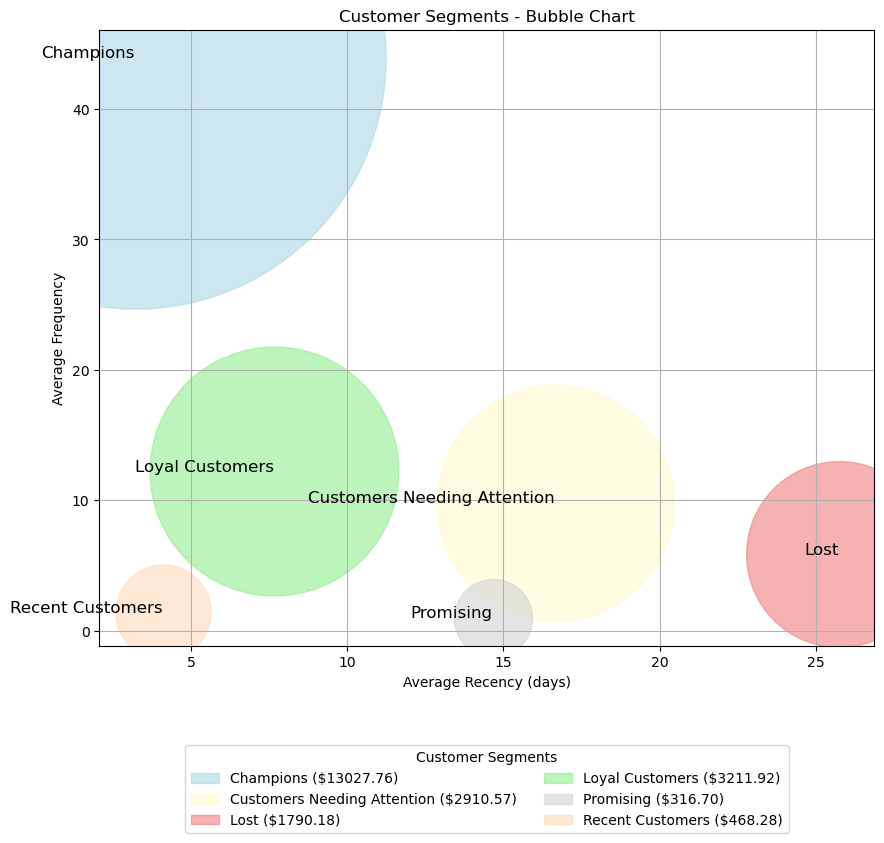

In [294]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches


# Prepare data for the bubble chart
segment_data = rfm.groupby('Segment').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'Monetary': 'mean',
    'user_id': 'count'  
}).reset_index()

# Rename columns for clarity
segment_data.columns = ['Segment', 'Avg_Recency', 'Avg_Frequency', 'Avg_Monetary', 'Customer_Count']

colors = {
    'Champions': '#ADD8E6',  
    'Loyal Customers': '#90EE90', 
    'Potential Loyalist': '#FFB6C1', 
    'Recent Customers': '#FFDAB9', 
    'Promising': '#D3D3D3', 
    'Customers Needing Attention': '#FFFACD', 
    'Lost': '#F08080'  
}

# Plot the bubble chart
plt.figure(figsize=(10, 8))
for segment in segment_data['Segment']:
    subset = segment_data[segment_data['Segment'] == segment]
    plt.scatter(
        subset['Avg_Recency'], 
        subset['Avg_Frequency'], 
        s=subset['Avg_Monetary'] * 10, 
        alpha=0.6, 
        color=colors.get(segment, '#87CEEB')  
    )

# Add labels to the bubbles
for i in range(segment_data.shape[0]):
    plt.text(segment_data['Avg_Recency'][i], segment_data['Avg_Frequency'][i], 
             segment_data['Segment'][i], fontsize=12, ha='right')

# Label the axes
plt.xlabel('Average Recency (days)')
plt.ylabel('Average Frequency')
plt.title('Customer Segments - Bubble Chart')

# Create a custom legend with smaller bubbles
legend_patches = [
    mpatches.Circle((0, 0), 5, color=colors.get(key, '#87CEEB'), alpha=0.6, label=f"{key} (${segment_data[segment_data['Segment'] == key]['Avg_Monetary'].values[0]:.2f})")
    for key in segment_data['Segment']
]

# Position the legend below the chart
plt.legend(handles=legend_patches, title="Customer Segments", bbox_to_anchor=(0.5, -0.15), loc='upper center', ncol=2)
plt.grid(True)

# Show the plot
plt.show()


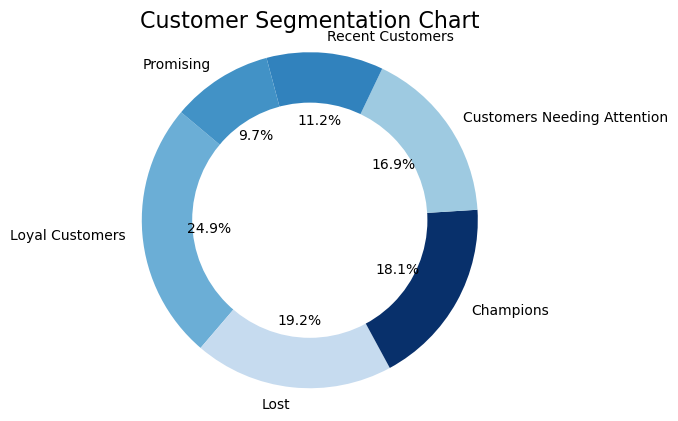

In [1]:
import matplotlib.pyplot as plt

# Data
labels = ['Loyal Customers', 'Lost', 'Champions', 'Customers Needing Attention', 'Recent Customers', 'Promising']
sizes = [751060, 579077, 546885, 511044, 339860, 294364]


colors = ['#6baed6', 
          '#c6dbef',  
          '#08306b',  
          '#9ecae1', 
          '#3182bd',  
          '#4292c6'] 

# Create a pie chart
fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140, wedgeprops={'width': 0.8})

# Draw circle for the donut shape
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig.gca().add_artist(centre_circle)


ax.set_title('Customer Segmentation Chart', fontsize=16)

# Equal aspect ratio ensures that pie is drawn as a circle.
ax.axis('equal')

# Show the chart
plt.show()


**Customer Journey Map**

In [2]:
import dask.dataframe as dd

# Load the data
df = dd.read_csv('Oct_2019_test_1.csv')

# Drop the 'category_id' and 'user_session' columns
df = df.drop(['Product_category','product_id','Product_name'], axis=1)


df.to_csv('Oct_2019_cx_map.csv', index=False, single_file=True)

print("Columns dropped and file saved successfully.")


Columns dropped and file saved successfully.


In [3]:
import pandas as pd
df = pd.read_csv('Oct_2019_cx_map.csv', parse_dates=['event_time'])
df = df.sort_values(by=['user_id', 'event_time'])

In [4]:
df['event_sequence'] = df.groupby('user_id')['event_type'].transform(lambda x: ' > '.join(x))
unique_paths = df[['user_id', 'event_sequence']].drop_duplicates()

In [8]:
common_paths = unique_paths['event_sequence'].value_counts().head(5)
print(common_paths)

event_sequence
view                                692801
view > view                         354587
view > view > view                  249303
view > view > view > view           173049
view > view > view > view > view    129585
Name: count, dtype: int64


In [1]:
import plotly.graph_objects as go

# Define the labels and transitions
labels = ["View", "Add to Cart", "Purchase", "Drop Off"]
source = [0, 1, 0, 2]  # Indices correspond to labels
target = [1, 2, 3, 3]
values = [100, 50, 30, 20]  # Example data

# Create the Sankey diagram
fig = go.Figure(go.Sankey(
    node=dict(
        pad=15,
        thickness=20,
        line=dict(color="black", width=0.5),
        label=labels,
        color=["blue", "green", "orange", "red"]
    ),
    link=dict(
        source=source,
        target=target,
        value=values
    )))

# Add annotations manually by estimating positions
annotations = [
    dict(x=0.25, y=0.85, text=f'{values[0]}', showarrow=False, font=dict(size=12, color='black')),
    dict(x=0.50, y=0.70, text=f'{values[1]}', showarrow=False, font=dict(size=12, color='black')),
    dict(x=0.50, y=0.20, text=f'{values[2]}', showarrow=False, font=dict(size=12, color='black')),
    dict(x=0.75, y=0.10, text=f'{values[3]}', showarrow=False, font=dict(size=12, color='black')),
]

# Update the layout to include annotations
fig.update_layout(
    title_text="Customer Journey for Oct 2019",
    font_size=10,
    annotations=annotations
)

# Show the plot
fig.show()

Average Purchases Per Hour for Q4 2019

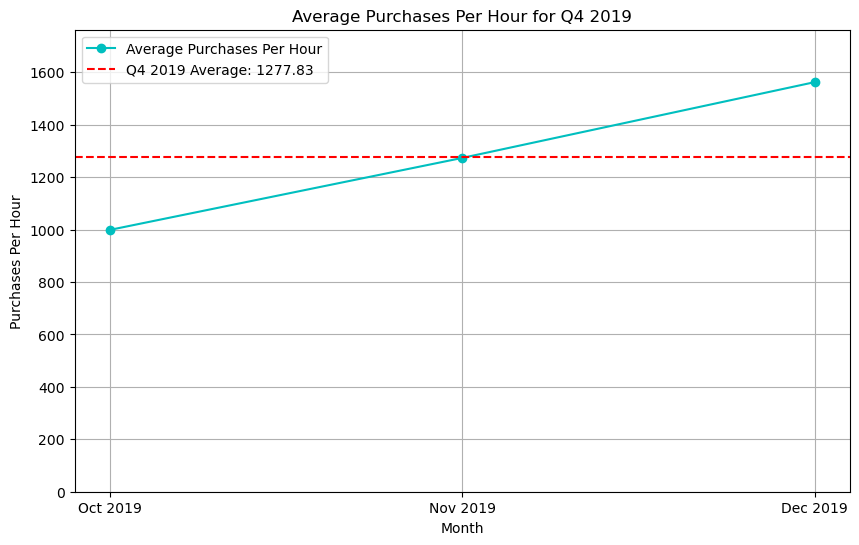

In [7]:

# Define the months again since they are needed for the plot
months = ['Oct 2019', 'Nov 2019', 'Dec 2019']

# Data for the average number of purchases per hour
purchases_per_hour = [998.6, 1273, 1561.89]

# Calculate the average purchases per hour for Q4 2019
average_purchases_per_hour_q4 = sum(purchases_per_hour) / len(purchases_per_hour)

# Create the line plot for average purchases per hour
plt.figure(figsize=(10, 6))
plt.plot(months, purchases_per_hour, marker='o', linestyle='-', color='c', label='Average Purchases Per Hour')

# Draw a horizontal line for the average purchases per hour
plt.axhline(y=average_purchases_per_hour_q4, color='r', linestyle='--', label=f'Q4 2019 Average: {average_purchases_per_hour_q4:.2f}')

# Add labels and title
plt.title('Average Purchases Per Hour for Q4 2019')
plt.xlabel('Month')
plt.ylabel('Purchases Per Hour')
plt.ylim(0, max(purchases_per_hour) + 200)
plt.legend()

# Display the plot
plt.grid(True)
plt.show()
